### **Credit Risk Analytics**

### **Problem Statement:**

CredX is a leading credit card provider that gets thousands of credit card applicants every year. But in the past few years, it has experienced an increase in credit loss. The CEO believes that the best strategy to mitigate credit risk is to ‘acquire the right customers’.

### **Objective:**

In this project, you will help CredX identify the right customers using predictive models. Using past data of the bank’s applicants, you need to determine the factors affecting credit risk and create strategies to mitigate the acquisition risk.

### **Data analysis process:**

Analysis will be done as follows.

1. Understanding data
2. Data cleaning (Removing duplicates, treating outiliers and missing values etc.)
3. Exporatory data analysis
4. Weight of Evidence (WOE) transforamtion and Information Value (IV) analysis.
5. Model building
6. Model evaluation

In [3]:
# Load the following packages.

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xverse.transformer import WOE
import kds

### **Understanding the data**

In [4]:
# Loading the given datasets.

demographic = pd.read_csv("Demographic data.csv")

credit_bureau = pd.read_csv("Credit Bureau data.csv")

In [5]:
# View the structure of dataframe demograhic.

demographic

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
71290,254036864,44,M,Married,3.0,15.0,Professional,SAL,Rented,6,3,0.0
71291,375231276,24,M,Single,1.0,4.5,Bachelor,SAL,Owned,20,7,1.0
71292,32481239,33,M,Married,4.0,6.0,Bachelor,SE_PROF,Rented,37,25,0.0
71293,704812159,52,M,Married,3.0,4.5,Bachelor,SE,Rented,76,57,0.0


In [6]:
# View the structure of dataframe credit_bureau.

credit_bureau

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71290,254036864,1,2,4,1,3,6,NaN,3.0,9,3,5,4,6,0.0,1028144.0,8,0,0.0
71291,375231276,0,1,2,0,1,2,NaN,4.0,11,3,6,2,4,1.0,3564911.0,9,0,1.0
71292,32481239,0,1,2,1,3,2,NaN,1.0,8,1,5,2,4,1.0,3386883.0,7,0,0.0
71293,704812159,2,2,4,3,4,5,62.0,3.0,10,3,5,4,6,1.0,3475822.0,9,0,0.0


### Data Preparation

In [7]:
# Merging the data frames by "Application ID".

master_df = pd.merge(demographic, credit_bureau, on = "Application ID")

master_df

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,...,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,...,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,...,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,...,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,...,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,...,1,0,0,0,0,1.0,3014283.0,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71296,254036864,44,M,Married,3.0,15.0,Professional,SAL,Rented,6,...,9,3,5,4,6,0.0,1028144.0,8,0,0.0
71297,375231276,24,M,Single,1.0,4.5,Bachelor,SAL,Owned,20,...,11,3,6,2,4,1.0,3564911.0,9,0,1.0
71298,32481239,33,M,Married,4.0,6.0,Bachelor,SE_PROF,Rented,37,...,8,1,5,2,4,1.0,3386883.0,7,0,0.0
71299,704812159,52,M,Married,3.0,4.5,Bachelor,SE,Rented,76,...,10,3,5,4,6,1.0,3475822.0,9,0,0.0


In [8]:
# Removing column "Performance Tag_x".

master_df.drop(["Performance Tag_x"], axis = 1, inplace = True)

In [9]:
# Checking if there are any missing values.

master_df.isnull().sum()

Application ID                                                        0
Age                                                                   0
Gender                                                                2
Marital Status (at the time of application)                           6
No of dependents                                                      3
Income                                                                0
Education                                                           119
Profession                                                           14
Type of residence                                                     8
No of months in current residence                                     0
No of months in current company                                       0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                    

In [10]:
# Extracting data where Performance Tag_y is null and storing it as dataframe "rejected".

rejected = master_df[master_df['Performance Tag_y'].isnull()]

rejected

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,...,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y
69609,906908303,35,M,Single,1.0,6.0,Bachelor,SAL,Rented,22,...,12,3,7,2,4,0.0,1309623.0,13,0,NaN
69610,10990583,47,F,Married,4.0,12.0,Masters,SE,Rented,122,...,7,3,4,3,5,0.0,775626.0,7,0,NaN
69611,589678446,46,M,Married,3.0,7.0,Professional,SE,Rented,10,...,7,2,4,0,3,0.0,732602.0,8,0,NaN
69612,809411322,41,M,Married,3.0,18.0,Masters,SAL,Rented,6,...,7,1,4,4,5,0.0,842057.0,8,0,NaN
69613,150246616,42,F,Married,4.0,17.0,Phd,SAL,Rented,8,...,7,2,3,3,6,0.0,786997.0,7,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71246,717735702,38,F,Single,5.0,45.0,Bachelor,SE,Rented,60,...,11,3,5,3,4,0.0,967098.0,10,0,NaN
71247,979080449,40,M,Married,5.0,19.0,Professional,SAL,Rented,6,...,4,1,2,4,7,0.0,399466.0,3,0,NaN
71248,815278690,35,M,Married,1.0,7.0,Masters,SE,Rented,14,...,9,3,5,2,4,0.0,872693.0,8,0,NaN
71249,736895532,37,M,Married,4.0,33.0,Bachelor,SE,Rented,6,...,8,2,3,2,4,0.0,595010.0,7,0,NaN


In [11]:
# Extracting data where Performance Tag_y is not null and storing it as dataframe "master_approved".

master_approved = master_df.dropna(axis = 0, subset = ["Performance Tag_y"])

master_approved

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,...,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,...,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,...,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,...,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,...,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,...,1,0,0,0,0,1.0,3014283.0,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71296,254036864,44,M,Married,3.0,15.0,Professional,SAL,Rented,6,...,9,3,5,4,6,0.0,1028144.0,8,0,0.0
71297,375231276,24,M,Single,1.0,4.5,Bachelor,SAL,Owned,20,...,11,3,6,2,4,1.0,3564911.0,9,0,1.0
71298,32481239,33,M,Married,4.0,6.0,Bachelor,SE_PROF,Rented,37,...,8,1,5,2,4,1.0,3386883.0,7,0,0.0
71299,704812159,52,M,Married,3.0,4.5,Bachelor,SE,Rented,76,...,10,3,5,4,6,1.0,3475822.0,9,0,0.0


In [12]:
# Calculating application rejection rate.

rejection_rate = (rejected.shape[0]/master_df.shape[0]) * 100

rejection_rate 

# Rejection rate is 1.99%.

1.9985694450288214

In [13]:
# Calculating application approval rate.

approval_rate = abs(1 - rejection_rate) * 100

approval_rate

# Approval rate is 99.8%.

99.85694450288214

In [14]:
# Checking if there are any missing values.

master_approved.isnull().sum()

Application ID                                                        0
Age                                                                   0
Gender                                                                2
Marital Status (at the time of application)                           6
No of dependents                                                      3
Income                                                                0
Education                                                           118
Profession                                                           13
Type of residence                                                     8
No of months in current residence                                     0
No of months in current company                                       0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                    

In [15]:
# Checking if there are any missing values.

rejected.isnull().sum()

Application ID                                                        0
Age                                                                   0
Gender                                                                0
Marital Status (at the time of application)                           0
No of dependents                                                      0
Income                                                                0
Education                                                             1
Profession                                                            1
Type of residence                                                     0
No of months in current residence                                     0
No of months in current company                                       0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                    

In [16]:
# Converting certain columns in "master_approved" and "rejected" to datatype object.

master_approved["Presence of open home loan"] = master_approved["Presence of open home loan"].astype(str)

master_approved["Presence of open auto loan"] = master_approved["Presence of open auto loan"].astype(str)

rejected["Presence of open home loan"] = rejected["Presence of open home loan"].astype(str)

rejected["Presence of open auto loan"] = rejected["Presence of open auto loan"].astype(str)

In [17]:
# Checking if any applicants are below age 18 in master_approved df.

master_approved.loc[master_approved['Age'] < 18]

# 65 applicants are below age 18.

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,...,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y
74,975085624,17,M,Single,2.0,31.0,Bachelor,SAL,Living with Parents,112,...,2,0,0,0,0,1.0,2997967.0,2,0,0.0
250,15988053,17,M,Single,3.0,40.0,Bachelor,SE_PROF,Owned,108,...,1,0,0,0,0,1.0,2993697.0,2,0,1.0
274,553384326,17,M,Single,3.0,19.0,Professional,SAL,Owned,72,...,1,0,0,0,0,0.0,16426.0,2,0,0.0
283,490791674,15,F,Single,2.0,36.0,Professional,SAL,Rented,112,...,1,0,0,0,0,1.0,3001433.0,4,0,0.0
313,584758872,16,M,Single,2.0,24.0,Bachelor,SAL,Rented,111,...,1,0,0,0,0,1.0,3757705.0,2,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66902,977872820,0,M,Married,2.0,45.0,Professional,SAL,Rented,59,...,7,2,4,1,3,0.0,743904.0,8,0,0.0
67608,915848904,0,M,Married,2.0,15.0,Phd,SE_PROF,Rented,61,...,7,2,4,2,3,0.0,811452.0,7,0,0.0
68049,852875477,0,M,NaN,1.0,5.0,Phd,NaN,Owned,14,...,9,3,4,3,3,0.0,1016748.0,10,1,0.0
68446,585528536,0,F,Married,3.0,25.0,Bachelor,SAL,Owned,125,...,11,4,6,3,7,0.0,1082840.0,12,0,0.0


In [18]:
# Checking if any applicants are below age 18 in rejected df.

rejected.loc[rejected['Age'] < 18]

# There is no applicant below age 18.

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,...,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y


In [19]:
# Dropping applicants below age 18 in master_approved df.

master_approved.drop(master_approved.loc[master_approved['Age'] < 18].index, inplace = True)

master_approved

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,...,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,...,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,...,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,...,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,...,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,...,1,0,0,0,0,1.0,3014283.0,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71296,254036864,44,M,Married,3.0,15.0,Professional,SAL,Rented,6,...,9,3,5,4,6,0.0,1028144.0,8,0,0.0
71297,375231276,24,M,Single,1.0,4.5,Bachelor,SAL,Owned,20,...,11,3,6,2,4,1.0,3564911.0,9,0,1.0
71298,32481239,33,M,Married,4.0,6.0,Bachelor,SE_PROF,Rented,37,...,8,1,5,2,4,1.0,3386883.0,7,0,0.0
71299,704812159,52,M,Married,3.0,4.5,Bachelor,SE,Rented,76,...,10,3,5,4,6,1.0,3475822.0,9,0,0.0


In [20]:
# Summary of attribute "Income".

master_approved["Income"].describe()

# There are records with income less than zero.

count    69811.000000
mean        27.406125
std         15.478684
min         -0.500000
25%         14.000000
50%         27.000000
75%         40.000000
max         60.000000
Name: Income, dtype: float64

In [21]:
# Records with income less than zero are assigned a value zero as income can't be negative.

master_approved.loc[master_approved['Income'] < 0, 'Income'] = 0

### **Exploratory data analysis**

### **Effect of categorical variables on credit default**

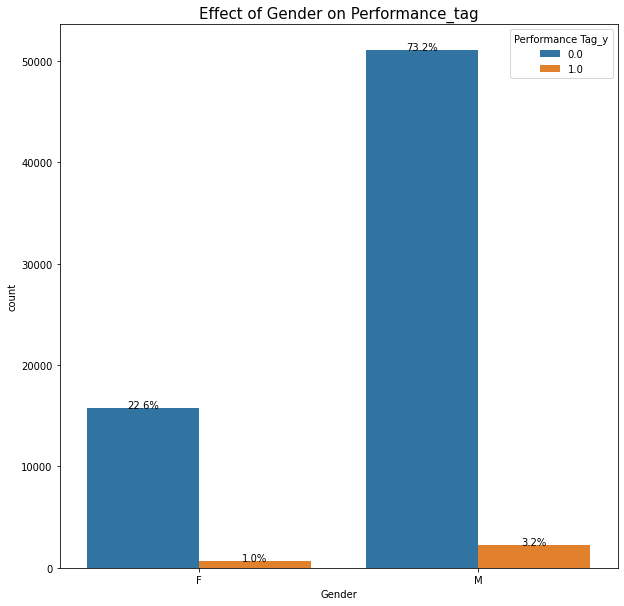

In [26]:
# Effect of Gender on default.

plt.figure(figsize = (10,10))
total = float(len(master_approved))
ax = sns.countplot(x = "Gender", hue = "Performance Tag_y", data = master_approved)
plt.title('Effect of Gender on Performance_tag', fontsize = 15)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 0.2
    ax.annotate(percentage, (x, y),ha = 'center')
plt.show()

# Male applicants are more likely to default.

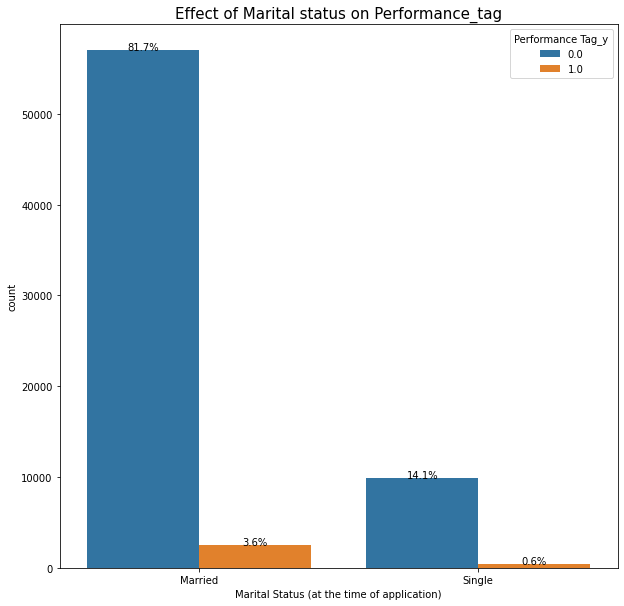

In [27]:
# Effect of Marital status on default.

plt.figure(figsize = (10,10))
total = float(len(master_approved))
ax = sns.countplot(x = "Marital Status (at the time of application)", hue = "Performance Tag_y", data = master_approved)
plt.title('Effect of Marital status on Performance_tag', fontsize = 15)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 0.2
    ax.annotate(percentage, (x, y),ha = 'center')
plt.show()

# Married people are more likely to default.

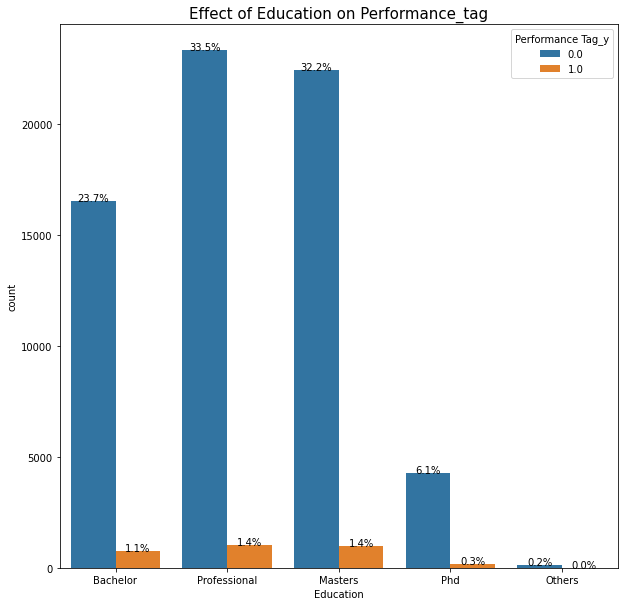

In [28]:
# Effect of Education on default.

plt.figure(figsize = (10,10))
total = float(len(master_approved))
ax = sns.countplot(x = "Education", hue = "Performance Tag_y", data = master_approved)
plt.title('Effect of Education on Performance_tag', fontsize = 15)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 0.2
    ax.annotate(percentage, (x, y),ha = 'center')
plt.show()

# Applicants with master's degree are more likely to default.

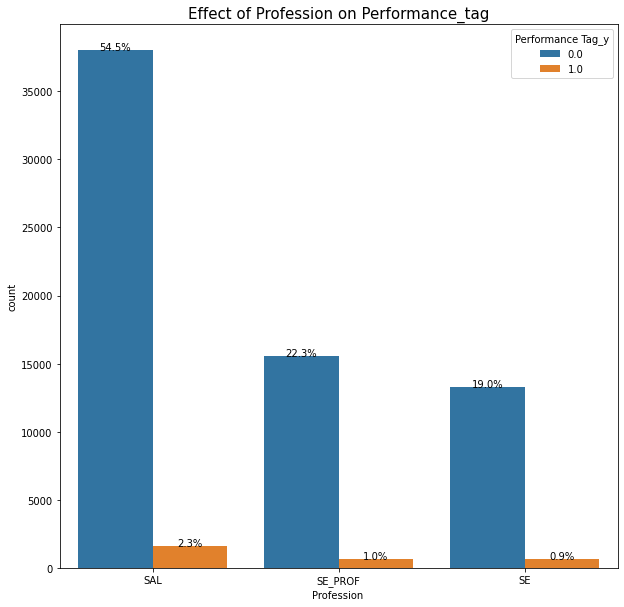

In [29]:
# Effect of Profession on default.

plt.figure(figsize = (10,10))
total = float(len(master_approved))
ax = sns.countplot(x = "Profession ", hue = "Performance Tag_y", data = master_approved)
plt.title('Effect of Profession on Performance_tag', fontsize = 15)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 0.2
    ax.annotate(percentage, (x, y),ha = 'center')
plt.show()

# SAL professionals are likely to default.

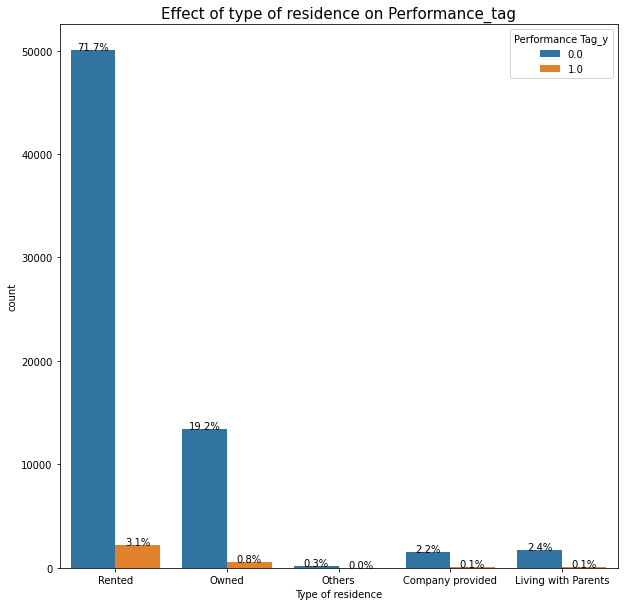

In [30]:
# Effect of type of residence on default.

plt.figure(figsize = (10,10))
total = float(len(master_approved))
ax = sns.countplot(x = "Type of residence", hue = "Performance Tag_y", data = master_approved)
plt.title('Effect of type of residence on Performance_tag', fontsize = 15)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 0.2
    ax.annotate(percentage, (x, y),ha = 'center')
plt.show()

# Applicants with rented type of residence are likely to default.

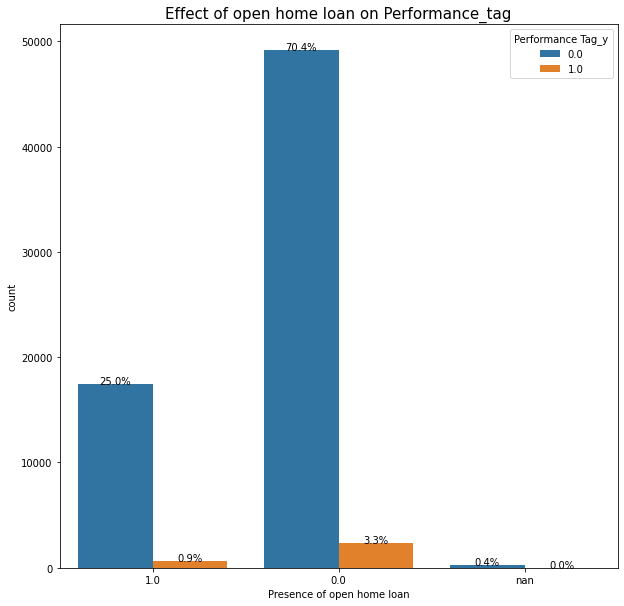

In [31]:
# Effect of presence of home loan on default.

plt.figure(figsize = (10,10))
total = float(len(master_approved))
ax = sns.countplot(x = "Presence of open home loan", hue = "Performance Tag_y", data = master_approved)
plt.title('Effect of open home loan on Performance_tag', fontsize = 15)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 0.2
    ax.annotate(percentage, (x, y),ha = 'center')
plt.show()

# Applicants who don't have home loan are likely to default.

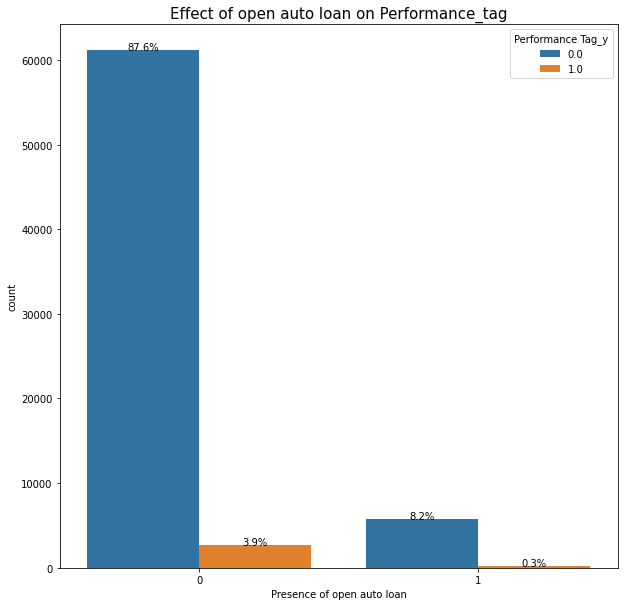

In [32]:
# Effect of presence of auto loan on default.

plt.figure(figsize = (10,10))
total = float(len(master_approved))
ax = sns.countplot(x = "Presence of open auto loan", hue = "Performance Tag_y", data = master_approved)
plt.title('Effect of open auto loan on Performance_tag', fontsize = 15)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 0.2
    ax.annotate(percentage, (x, y),ha = 'center')
plt.show()

# Applicants with no auto loans are likely to default.

### **Effect of continuous variables on credit default**

<Figure size 720x720 with 0 Axes>

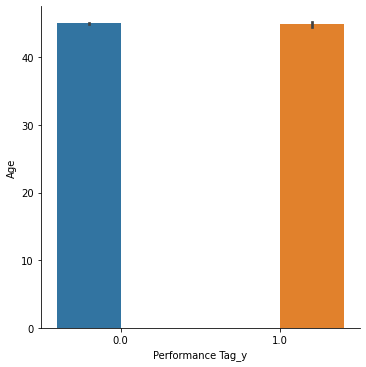

In [34]:
# Effect of Age on default.

plt.figure(figsize = (10,10))

sns.catplot(x = "Performance Tag_y", y = "Age", hue = "Performance Tag_y", kind = "bar", data = master_approved)

# No significant difference is seen in age in terms of default.

<Figure size 720x720 with 0 Axes>

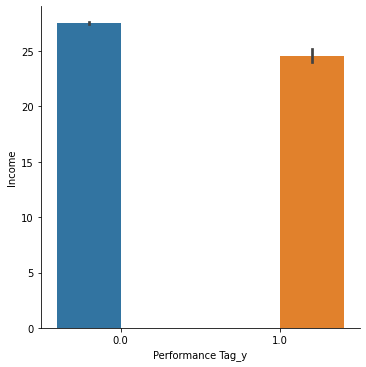

In [35]:
# Effect of Income on default.

plt.figure(figsize = (10,10))

sns.catplot(x = "Performance Tag_y", y = "Income", hue = "Performance Tag_y", kind = "bar", data = master_approved)

# Applicants with less income are likely to default.

<Figure size 720x720 with 0 Axes>

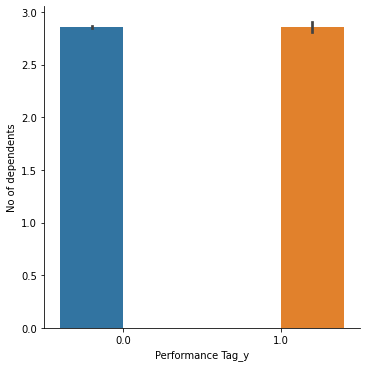

In [36]:
# Effect of No of dependents on default.

plt.figure(figsize = (10,10))

sns.catplot(x = "Performance Tag_y", y = "No of dependents", hue = "Performance Tag_y", kind = "bar", data = master_approved)

# As no of dependents increases, chances of default increases.

<Figure size 720x720 with 0 Axes>

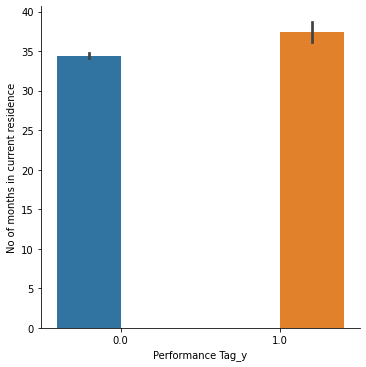

In [37]:
# Effect of No of months in current residence on default.

plt.figure(figsize = (10,10))

sns.catplot(x = "Performance Tag_y", y = "No of months in current residence", hue = "Performance Tag_y", kind = "bar", data = master_approved)

# As no of months in current residence increases, chances of default increases.

<Figure size 720x720 with 0 Axes>

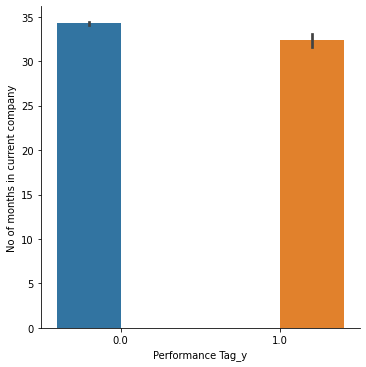

In [38]:
# Effect of No of months in current company on default.

plt.figure(figsize = (10,10))

sns.catplot(x = "Performance Tag_y", y = "No of months in current company", hue = "Performance Tag_y", kind = "bar", data = master_approved)

# As no of months in current company decreases, chances of default increases.

<Figure size 720x720 with 0 Axes>

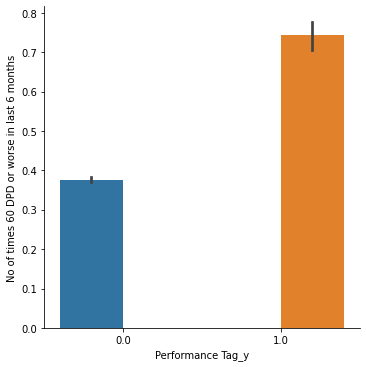

In [39]:
# Effect of No of times 60 DPD or worse in last 6 months on default.

plt.figure(figsize = (10,10))

sns.catplot(x = "Performance Tag_y", y = "No of times 60 DPD or worse in last 6 months", hue = "Performance Tag_y", kind = "bar", data = master_approved)

# As No of times 60 DPD or worse in last 6 months increases, chances of default increases. 

<Figure size 720x720 with 0 Axes>

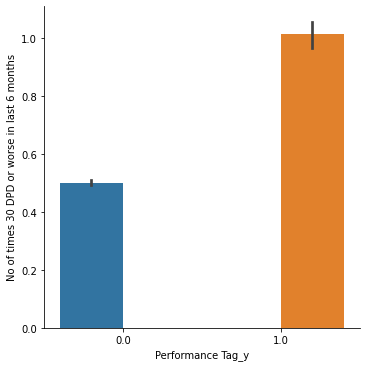

In [40]:
# Effect of No of times 30 DPD or worse in last 6 months on default.

plt.figure(figsize = (10,10))

sns.catplot(x = "Performance Tag_y", y = "No of times 30 DPD or worse in last 6 months", hue = "Performance Tag_y", kind = "bar", data = master_approved)

# As No of times 30 DPD or worse in last 6 months increases, chances of default increases.

<Figure size 720x720 with 0 Axes>

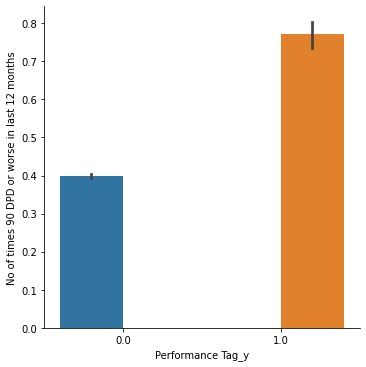

In [41]:
# Effect of No of times 90 DPD or worse in last 12 months on default.

plt.figure(figsize = (10,10))

sns.catplot(x = "Performance Tag_y", y = "No of times 90 DPD or worse in last 12 months", hue = "Performance Tag_y", kind = "bar", data = master_approved)

# As No of times 90 DPD or worse in last 12 months increases, chances of default increases. 

<Figure size 720x720 with 0 Axes>

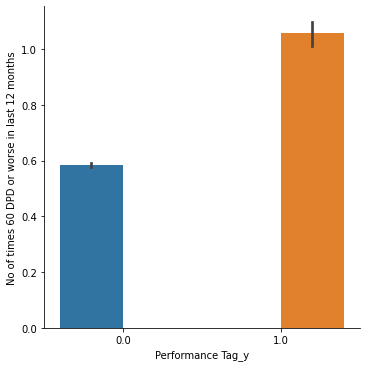

In [42]:
# Effect of No of times 60 DPD or worse in last 12 months on default.

plt.figure(figsize = (10,10))

sns.catplot(x = "Performance Tag_y", y = "No of times 60 DPD or worse in last 12 months", hue = "Performance Tag_y", kind = "bar", data = master_approved)

# As No of times 60 DPD or worse in last 12 months increases, chances of default increases. 

<Figure size 720x720 with 0 Axes>

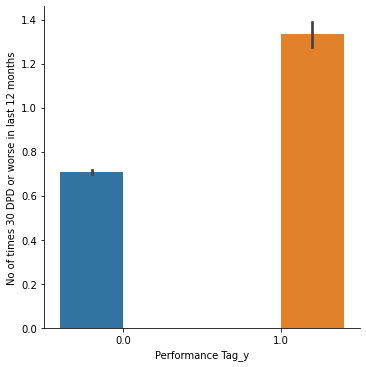

In [43]:
# Effect of No of times 30 DPD or worse in last 12 months on default.

plt.figure(figsize = (10,10))

sns.catplot(x = "Performance Tag_y", y = "No of times 30 DPD or worse in last 12 months", hue = "Performance Tag_y", kind = "bar", data = master_approved)

# As No of times 30 DPD or worse in last 12 months increases, chances of default increases. 

<Figure size 720x720 with 0 Axes>

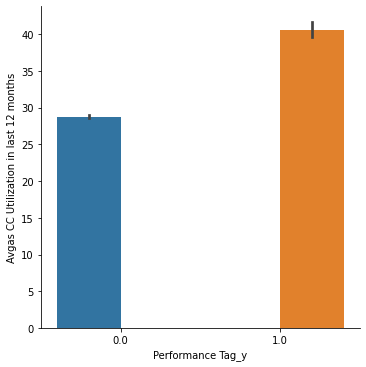

In [44]:
# Effect of Avgas CC Utilization in last 12 months on default.

plt.figure(figsize = (10,10))

sns.catplot(x = "Performance Tag_y", y = "Avgas CC Utilization in last 12 months", hue = "Performance Tag_y", kind = "bar", data = master_approved)

# As Avgas CC Utilization in last 12 months increases, chances of default increases. 

<Figure size 720x720 with 0 Axes>

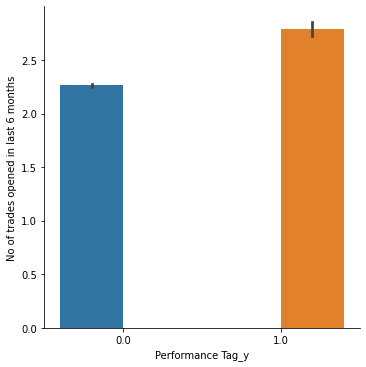

In [45]:
# Effect of No of trades opened in last 6 months on default.

plt.figure(figsize = (10,10))

sns.catplot(x = "Performance Tag_y", y = "No of trades opened in last 6 months", hue = "Performance Tag_y", kind = "bar", data = master_approved)

# As No of trades opened in last 6 months increases, chances of default increases. 

<Figure size 720x720 with 0 Axes>

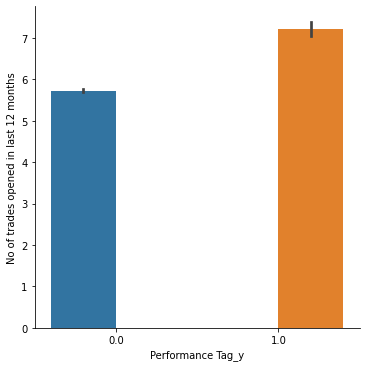

In [46]:
# Effect of No of trades opened in last 12 months on default.

plt.figure(figsize = (10,10))

sns.catplot(x = "Performance Tag_y", y = "No of trades opened in last 12 months", hue = "Performance Tag_y", kind = "bar", data = master_approved)

# As No of trades opened in last 12 months increases, chances of default increases. 

<Figure size 720x720 with 0 Axes>

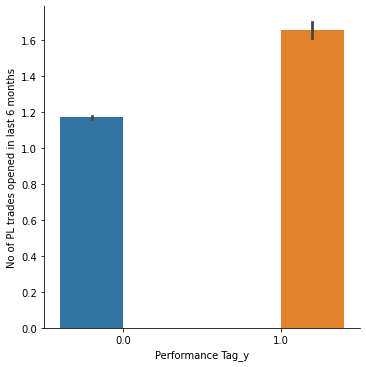

In [47]:
# Effect of No of PL trades opened in last 6 months on default.

plt.figure(figsize = (10,10))

sns.catplot(x = "Performance Tag_y", y = "No of PL trades opened in last 6 months", hue = "Performance Tag_y", kind = "bar", data = master_approved)

# As No of PL trades opened in last 6 months increases, chances of default increases. 

<Figure size 720x720 with 0 Axes>

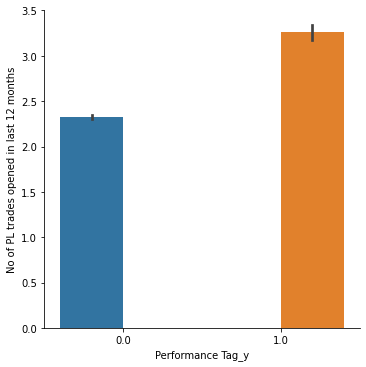

In [48]:
# Effect of No of PL trades opened in last 12 months on default.

plt.figure(figsize = (10,10))

sns.catplot(x = "Performance Tag_y", y = "No of PL trades opened in last 12 months", hue = "Performance Tag_y", kind = "bar", data = master_approved)

# As No of PL trades opened in last 12 months increases, chances of default increases. 

<Figure size 720x720 with 0 Axes>

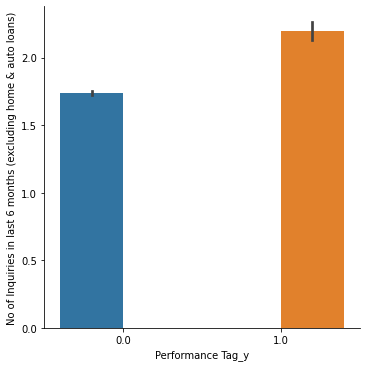

In [49]:
# Effect of No of Inquiries in last 6 months on default.

plt.figure(figsize = (10,10))

sns.catplot(x = "Performance Tag_y", y = "No of Inquiries in last 6 months (excluding home & auto loans)", hue = "Performance Tag_y", kind = "bar", data = master_approved)

# As No of Inquiries in last 6 months increases, chances of default increases. 

<Figure size 720x720 with 0 Axes>

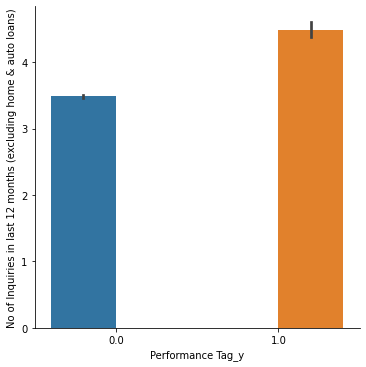

In [50]:
# Effect of No of Inquiries in last 12 months on default.

plt.figure(figsize = (10,10))

sns.catplot(x = "Performance Tag_y", y = "No of Inquiries in last 12 months (excluding home & auto loans)", hue = "Performance Tag_y", kind = "bar", data = master_approved)

# As No of Inquiries in last 12 months increases, chances of default increases. 

<Figure size 720x720 with 0 Axes>

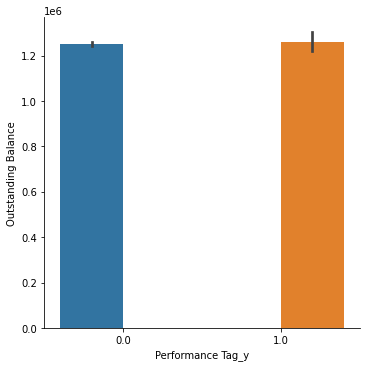

In [51]:
# Effect of Outstanding Balance on default.

plt.figure(figsize = (10,10))

sns.catplot(x = "Performance Tag_y", y = "Outstanding Balance", hue = "Performance Tag_y", kind = "bar", data = master_approved)

# As Outstanding Balance increases, chances of default increases. 

<Figure size 720x720 with 0 Axes>

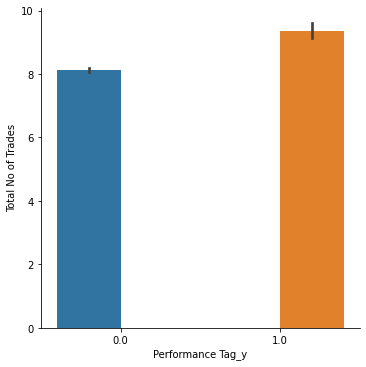

In [52]:
# Effect of Total No of Trades on default.

plt.figure(figsize = (10,10))

sns.catplot(x = "Performance Tag_y", y = "Total No of Trades", hue = "Performance Tag_y", kind = "bar", data = master_approved)

# As Total No of Trades increases, chances of default increases. 

### **Insights:**

1. Male applicants are more likely to default.
2. Married people are more likely to default.
3. Applicants holding master's degree are more likely to default.
4. SAL professionals are more likely to default.
5. Applicants with type of residence as rented are more likely to default.
6. Applicants who don't have home loans or auto loans are more likely to default.
7. Young people are more likely to default.
8. Applicants with less income are more likely to default.
9. As no. of months in current residence increases, chances of default increases.
10. As no. of months in current company decreases, chances of default increases.
11. As no. of times 60DPD or worse in last 6 months increases, chances of default increases.
12. As no. of times 60DPD or worse in last 12 months increases, chances of default increases.
13. As no. of times 30DPD or worse in last 6 months increases, chances of default increases.
14. As no. of times 30DPD or worse in last 12 months increases, chances of default increases.
15. As no. of times 90DPD or worse in last 6 months increases, chances of default increases.
16. As no. of times 90DPD or worse in last 12 months increases, chances of default increases.
17. As Avgas CC utilization in last 12 months increases, chances of default increases.
18. As No of trades opened in last 6 months increases, chances of default increases.
19. As No of trades opened in last 12 months increases, chances of default increases.
20. As No of PL trades opened in last 6 months increases, chances of default increases.
21. As No of PL trades opened in last 12 months increases, chances of default increases.
22. As No of inquiries in last 6 months increases, chances of default increases.
23. As No of inquiries in last 12 months increases, chances of default increases.
24. As Outstanding Balance increases, chances of default increases.
25. As Total no of trades increases, chances of default increases.

### **Treating categorical variables**

In [53]:
# Extracting only cartegorical column from master_approved.

cat_cols = master_approved.select_dtypes(include = 'object')

In [54]:
# Getting column names from df cat_cols.

cat_cols.columns

Index(['Gender', 'Marital Status (at the time of application)', 'Education',
       'Profession ', 'Type of residence', 'Presence of open home loan',
       'Presence of open auto loan'],
      dtype='object')

In [55]:
# Creating dummy varibles for categorical variables of df "master_approved".

dummy = pd.get_dummies(master_approved, columns = ['Gender', 'Marital Status (at the time of application)', 'Education', 'Profession ', 'Type of residence', 'Presence of open home loan', 'Presence of open auto loan'], drop_first = True)

master_approved = pd.concat([master_approved, dummy], axis = 1)

master_approved.drop(['Gender', 'Marital Status (at the time of application)', 'Education', 'Profession ', 'Type of residence', 'Presence of open home loan', 'Presence of open auto loan'], axis = 1, inplace = True)

In [56]:
# Creating dummy varibles for categorical variables df "rejected"

dummy = pd.get_dummies(rejected, columns = ['Gender', 'Marital Status (at the time of application)', 'Education', 'Profession ', 'Type of residence', 'Presence of open home loan', 'Presence of open auto loan'], drop_first = True)

rejected = pd.concat([rejected, dummy], axis = 1)

rejected.drop(['Gender', 'Marital Status (at the time of application)', 'Education', 'Profession ', 'Type of residence', 'Presence of open home loan', 'Presence of open auto loan'], axis = 1, inplace = True)

In [57]:
# Removing duplicate columns from master_approved.

master_approved = master_approved.loc[:,~master_approved.columns.duplicated()]

In [58]:
# Removing duplicate columns from rejected.

rejected = rejected.loc[:,~rejected.columns.duplicated()]

In [59]:
# View mater_approved after dummy variable creation.

master_approved

,Application ID,Age,No of dependents,Income,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,...,Education_Professional,Profession _SE,Profession _SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Owned,Type of residence_Rented,Presence of open home loan_1.0,Presence of open home loan_nan,Presence of open auto loan_1
0,954457215,48,2.0,40.0,113,56,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,432830445,31,4.0,55.0,112,46,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,941387308,32,2.0,46.0,104,49,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
3,392161677,43,1.0,53.0,94,53,0,0,0,0,...,0,1,0,0,0,0,1,1,0,1
4,182011211,35,5.0,44.0,112,43,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71296,254036864,44,3.0,15.0,6,3,1,2,4,1,...,1,0,0,0,0,0,1,0,0,0
71297,375231276,24,1.0,4.5,20,7,0,1,2,0,...,0,0,0,0,0,1,0,1,0,0
71298,32481239,33,4.0,6.0,37,25,0,1,2,1,...,0,0,1,0,0,0,1,1,0,0
71299,704812159,52,3.0,4.5,76,57,2,2,4,3,...,0,1,0,0,0,0,1,1,0,0


In [60]:
# View rejected after dummy variable creation.

rejected

,Application ID,Age,No of dependents,Income,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,...,Education_Phd,Education_Professional,Profession _SE,Profession _SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Owned,Type of residence_Rented,Presence of open home loan_1.0,Presence of open auto loan_1
69609,906908303,35,1.0,6.0,22,18,0,0,2,1,...,0,0,0,0,0,0,0,1,0,0
69610,10990583,47,4.0,12.0,122,25,1,1,1,3,...,0,0,1,0,0,0,0,1,0,0
69611,589678446,46,3.0,7.0,10,31,3,4,5,3,...,0,1,1,0,0,0,0,1,0,0
69612,809411322,41,3.0,18.0,6,47,1,3,4,3,...,0,0,0,0,0,0,0,1,0,0
69613,150246616,42,4.0,17.0,8,49,2,2,4,3,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71246,717735702,38,5.0,45.0,60,3,2,3,3,3,...,0,0,1,0,0,0,0,1,0,0
71247,979080449,40,5.0,19.0,6,13,2,2,4,4,...,0,1,0,0,0,0,0,1,0,0
71248,815278690,35,1.0,7.0,14,3,1,2,2,1,...,0,0,1,0,0,0,0,1,0,0
71249,736895532,37,4.0,33.0,6,12,1,3,4,2,...,0,0,1,0,0,0,0,1,0,0


In [61]:
# Removing column "Application ID".

master_approved.drop(["Application ID"], axis = 1, inplace = True)

rejected.drop(["Application ID"], axis = 1, inplace = True)

### **WOE Transformation and IV analysis**

In [62]:
# Splitting data as "X" and "y".

y = master_approved["Performance Tag_y"]

X = master_approved.drop(["Performance Tag_y"], axis = 1)

In [63]:
# Applying WOE transformation.

clf = WOE()

clf.fit(X, y)

print(clf.woe_df.head()) 

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


                            Variable_Name        Category  Count   Event  \
0                                     Age  (17.999, 40.0]  24577  1072.0   
1                                     Age    (40.0, 50.0]  22872   958.0   
2                                     Age    (50.0, 65.0]  22362   918.0   
3  Avgas CC Utilization in last 12 months  (-0.001, 10.0]  24531   476.0   
4  Avgas CC Utilization in last 12 months    (10.0, 32.0]  21389   853.0   

   Non_Event  Event_Rate  Non_Event_Rate  Event_Distribution  \
0    23505.0    0.043618        0.956382            0.363636   
1    21914.0    0.041885        0.958115            0.324966   
2    21444.0    0.041052        0.958948            0.311398   
3    24055.0    0.019404        0.980596            0.161465   
4    20536.0    0.039880        0.960120            0.289349   

   Non_Event_Distribution       WOE  Information_Value  
0                0.351540  0.033832           0.000708  
1                0.327745 -0.008514         

In [64]:
# Information value dataset.

IV = clf.iv_df 

In [65]:
# Converting IV to dataframe.

IV = pd.DataFrame(IV)

IV

,Variable_Name,Information_Value
1,Avgas CC Utilization in last 12 months,0.270385
22,No of trades opened in last 12 months,0.257714
9,No of Inquiries in last 12 months (excluding h...,0.229374
30,Total No of Trades,0.190222
16,No of times 30 DPD or worse in last 12 months,0.188798
23,No of trades opened in last 6 months,0.170194
21,No of times 90 DPD or worse in last 6 months,0.163373
17,No of times 30 DPD or worse in last 6 months,0.145354
18,No of times 60 DPD or worse in last 12 months,0.138378
24,Outstanding Balance,0.129008


In [67]:
# Calculation strength of variables using IV values.

IV.loc[IV['Information_Value'] < 0.02, 'Strength'] = "Not useful"

IV.loc[(IV['Information_Value'] >= 0.02) & (IV['Information_Value'] < 0.1), 'Strength'] = "Weak predictor"

IV.loc[(IV['Information_Value'] >= 0.1) & (IV['Information_Value'] < 0.3), 'Strength'] = "Medium predictor"

IV.loc[(IV['Information_Value'] >= 0.3) & (IV['Information_Value'] < 0.5), 'Strength'] = "Strong predictor"

IV.loc[IV['Information_Value'] > 0.5, 'Strength'] = "Suspecious predictor"

In [68]:
# View IV df.

IV

,Variable_Name,Information_Value,Strength
1,Avgas CC Utilization in last 12 months,0.270385,Medium predictor
22,No of trades opened in last 12 months,0.257714,Medium predictor
9,No of Inquiries in last 12 months (excluding h...,0.229374,Medium predictor
30,Total No of Trades,0.190222,Medium predictor
16,No of times 30 DPD or worse in last 12 months,0.188798,Medium predictor
23,No of trades opened in last 6 months,0.170194,Medium predictor
21,No of times 90 DPD or worse in last 6 months,0.163373,Medium predictor
17,No of times 30 DPD or worse in last 6 months,0.145354,Medium predictor
18,No of times 60 DPD or worse in last 12 months,0.138378,Medium predictor
24,Outstanding Balance,0.129008,Medium predictor


In [69]:
# Extracting variables with strength as "Medium  predictor"

imp_var = IV.loc[IV['Strength'] == "Medium predictor"]

imp_var

,Variable_Name,Information_Value,Strength
1,Avgas CC Utilization in last 12 months,0.270385,Medium predictor
22,No of trades opened in last 12 months,0.257714,Medium predictor
9,No of Inquiries in last 12 months (excluding h...,0.229374,Medium predictor
30,Total No of Trades,0.190222,Medium predictor
16,No of times 30 DPD or worse in last 12 months,0.188798,Medium predictor
23,No of trades opened in last 6 months,0.170194,Medium predictor
21,No of times 90 DPD or worse in last 6 months,0.163373,Medium predictor
17,No of times 30 DPD or worse in last 6 months,0.145354,Medium predictor
18,No of times 60 DPD or worse in last 12 months,0.138378,Medium predictor
24,Outstanding Balance,0.129008,Medium predictor


In [70]:
# Storing names of important variables identified through IV analysis.

imp_cols = ["No of trades opened in last 12 months",                              
"No of trades opened in last 6 months",                               
"Total No of Trades",                                                 
"No of times 30 DPD or worse in last 12 months",                      
"No of times 60 DPD or worse in last 12 months",                      
"No of Inquiries in last 12 months (excluding home & auto loans)",    
"No of times 30 DPD or worse in last 6 months",                       
"Avgas CC Utilization in last 12 months",                             
"Outstanding Balance",                                               
"No of times 90 DPD or worse in last 6 months"]

In [71]:
# Storing "Performance Tag_y" as target.

target = master_approved[["Performance Tag_y"]]

target

,Performance Tag_y
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
71296,0.0
71297,1.0
71298,0.0
71299,0.0


In [72]:
# Replacing original values with WOE values.

woe_data = clf.transform(X)

woe_data

,Age,No of dependents,Income,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,...,Education_Professional,Profession _SE,Profession _SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Owned,Type of residence_Rented,Presence of open home loan_1.0,Presence of open home loan_nan,Presence of open auto loan_1
0,-0.008514,-0.020399,-0.254137,0.084051,-0.113212,-0.261481,-0.121278,-0.198286,-0.134356,-0.201328,...,0.009760,-0.024255,0.004430,-0.001942,0.001193,-0.000618,-0.003976,-0.237951,0.001239,0.012010
1,0.033832,0.019791,-0.254137,0.084051,-0.113212,-0.261481,-0.121278,-0.198286,-0.134356,-0.201328,...,-0.018438,-0.024255,-0.014747,-0.001942,0.001193,-0.000618,-0.003976,0.072047,0.001239,0.012010
2,0.033832,-0.020399,-0.254137,0.084051,-0.113212,-0.261481,-0.121278,-0.198286,-0.134356,-0.201328,...,0.009760,-0.024255,-0.014747,-0.001942,0.001193,-0.000618,-0.003976,-0.237951,0.001239,0.012010
3,-0.008514,-0.020399,-0.254137,0.084051,-0.113212,-0.261481,-0.121278,-0.198286,-0.134356,-0.201328,...,0.009760,0.092319,0.004430,-0.001942,0.001193,-0.000618,-0.003976,-0.237951,0.001239,-0.138683
4,0.033832,0.005274,-0.254137,0.084051,-0.062451,-0.261481,-0.121278,-0.198286,-0.134356,-0.201328,...,-0.018438,-0.024255,0.004430,-0.001942,0.001193,-0.000618,-0.003976,-0.237951,0.001239,0.012010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71296,-0.008514,0.019791,0.189144,-0.043632,0.155488,0.588083,0.742705,0.741973,-0.134356,0.695294,...,-0.018438,-0.024255,0.004430,-0.001942,0.001193,-0.000618,-0.003976,0.072047,0.001239,0.012010
71297,0.033832,-0.020399,0.189144,-0.043632,0.155488,-0.261481,-0.121278,0.741973,-0.134356,-0.201328,...,0.009760,-0.024255,0.004430,-0.001942,0.001193,0.002463,0.011744,-0.237951,0.001239,0.012010
71298,0.033832,0.019791,0.189144,-0.043632,-0.062451,-0.261481,-0.121278,0.741973,-0.134356,0.695294,...,0.009760,-0.024255,-0.014747,-0.001942,0.001193,-0.000618,-0.003976,-0.237951,0.001239,0.012010
71299,-0.029484,0.019791,0.189144,0.084051,-0.113212,0.810222,0.742705,0.741973,0.724614,0.695294,...,0.009760,0.092319,0.004430,-0.001942,0.001193,-0.000618,-0.003976,-0.237951,0.001239,0.012010


In [73]:
# Storing variables of df "demographic" as "demo_cols".

demo_cols = ['Age', 'Gender_M',
       'Marital Status (at the time of application)_Single', 'No of dependents',
       'Income', 'Education_Masters', 'Education_Others', 'Education_Phd',
       'Education_Professional', 'Profession _SE', 'Profession _SE_PROF', 'Type of residence_Living with Parents', 'Type of residence_Others',
       'Type of residence_Owned', 'Type of residence_Rented' ,
       'No of months in current residence', 'No of months in current company']

In [74]:
# Extracting demograhic data from df "woe_data".

demographic_woe = woe_data[demo_cols]

demographic_woe

,Age,Gender_M,Marital Status (at the time of application)_Single,No of dependents,Income,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession _SE,Profession _SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Owned,Type of residence_Rented,No of months in current residence,No of months in current company
0,-0.008514,0.031933,-0.003871,-0.020399,-0.254137,-0.003801,-0.001056,0.001592,0.009760,-0.024255,0.004430,-0.001942,0.001193,-0.000618,-0.003976,0.084051,-0.113212
1,0.033832,-0.010068,-0.003871,0.019791,-0.254137,-0.003801,-0.001056,0.001592,-0.018438,-0.024255,-0.014747,-0.001942,0.001193,-0.000618,-0.003976,0.084051,-0.113212
2,0.033832,-0.010068,0.022117,-0.020399,-0.254137,-0.003801,-0.001056,0.001592,0.009760,-0.024255,-0.014747,-0.001942,0.001193,-0.000618,-0.003976,0.084051,-0.113212
3,-0.008514,-0.010068,-0.003871,-0.020399,-0.254137,-0.003801,-0.001056,0.001592,0.009760,0.092319,0.004430,-0.001942,0.001193,-0.000618,-0.003976,0.084051,-0.113212
4,0.033832,0.031933,-0.003871,0.005274,-0.254137,-0.003801,-0.001056,0.001592,-0.018438,-0.024255,0.004430,-0.001942,0.001193,-0.000618,-0.003976,0.084051,-0.062451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71296,-0.008514,-0.010068,-0.003871,0.019791,0.189144,-0.003801,-0.001056,0.001592,-0.018438,-0.024255,0.004430,-0.001942,0.001193,-0.000618,-0.003976,-0.043632,0.155488
71297,0.033832,-0.010068,0.022117,-0.020399,0.189144,-0.003801,-0.001056,0.001592,0.009760,-0.024255,0.004430,-0.001942,0.001193,0.002463,0.011744,-0.043632,0.155488
71298,0.033832,-0.010068,-0.003871,0.019791,0.189144,-0.003801,-0.001056,0.001592,0.009760,-0.024255,-0.014747,-0.001942,0.001193,-0.000618,-0.003976,-0.043632,-0.062451
71299,-0.029484,-0.010068,-0.003871,0.019791,0.189144,-0.003801,-0.001056,0.001592,0.009760,0.092319,0.004430,-0.001942,0.001193,-0.000618,-0.003976,0.084051,-0.113212


In [75]:
# Setting indices.

target.reset_index(drop = True, inplace = True)

demographic_woe.reset_index(drop = True, inplace = True)

In [76]:
# Joining df "demograhic_woe" and "target".

demographic_woe = pd.concat([demographic_woe, target], axis = 1)

demographic_woe

,Age,Gender_M,Marital Status (at the time of application)_Single,No of dependents,Income,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession _SE,Profession _SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Owned,Type of residence_Rented,No of months in current residence,No of months in current company,Performance Tag_y
0,-0.008514,0.031933,-0.003871,-0.020399,-0.254137,-0.003801,-0.001056,0.001592,0.009760,-0.024255,0.004430,-0.001942,0.001193,-0.000618,-0.003976,0.084051,-0.113212,0.0
1,0.033832,-0.010068,-0.003871,0.019791,-0.254137,-0.003801,-0.001056,0.001592,-0.018438,-0.024255,-0.014747,-0.001942,0.001193,-0.000618,-0.003976,0.084051,-0.113212,0.0
2,0.033832,-0.010068,0.022117,-0.020399,-0.254137,-0.003801,-0.001056,0.001592,0.009760,-0.024255,-0.014747,-0.001942,0.001193,-0.000618,-0.003976,0.084051,-0.113212,0.0
3,-0.008514,-0.010068,-0.003871,-0.020399,-0.254137,-0.003801,-0.001056,0.001592,0.009760,0.092319,0.004430,-0.001942,0.001193,-0.000618,-0.003976,0.084051,-0.113212,0.0
4,0.033832,0.031933,-0.003871,0.005274,-0.254137,-0.003801,-0.001056,0.001592,-0.018438,-0.024255,0.004430,-0.001942,0.001193,-0.000618,-0.003976,0.084051,-0.062451,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69806,-0.008514,-0.010068,-0.003871,0.019791,0.189144,-0.003801,-0.001056,0.001592,-0.018438,-0.024255,0.004430,-0.001942,0.001193,-0.000618,-0.003976,-0.043632,0.155488,0.0
69807,0.033832,-0.010068,0.022117,-0.020399,0.189144,-0.003801,-0.001056,0.001592,0.009760,-0.024255,0.004430,-0.001942,0.001193,0.002463,0.011744,-0.043632,0.155488,1.0
69808,0.033832,-0.010068,-0.003871,0.019791,0.189144,-0.003801,-0.001056,0.001592,0.009760,-0.024255,-0.014747,-0.001942,0.001193,-0.000618,-0.003976,-0.043632,-0.062451,0.0
69809,-0.029484,-0.010068,-0.003871,0.019791,0.189144,-0.003801,-0.001056,0.001592,0.009760,0.092319,0.004430,-0.001942,0.001193,-0.000618,-0.003976,0.084051,-0.113212,0.0


In [77]:
# Creating df "master_woe" from df "woe_data".

master_woe = woe_data[imp_cols]

master_woe

,No of trades opened in last 12 months,No of trades opened in last 6 months,Total No of Trades,No of times 30 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of Inquiries in last 12 months (excluding home & auto loans),No of times 30 DPD or worse in last 6 months,Avgas CC Utilization in last 12 months,Outstanding Balance,No of times 90 DPD or worse in last 6 months
0,-0.866630,-0.544238,-0.687516,-0.269700,-0.201328,-0.829725,-0.198286,-0.801162,-0.144491,-0.261481
1,-0.866630,-0.544238,0.211376,-0.269700,-0.201328,-0.829725,-0.198286,-0.801162,-0.441668,-0.261481
2,-0.866630,-0.544238,-0.687516,-0.269700,-0.201328,-0.829725,-0.198286,-0.801162,-0.144491,-0.261481
3,-0.866630,-0.544238,-0.687516,-0.269700,-0.201328,-0.829725,-0.198286,-0.059656,-0.144491,-0.261481
4,-0.866630,-0.544238,-0.687516,-0.269700,-0.201328,-0.829725,-0.198286,-0.059656,-0.144491,-0.261481
...,...,...,...,...,...,...,...,...,...,...
71296,0.367610,0.326435,0.211376,0.711146,0.695294,0.367410,0.741973,0.115424,0.413699,0.588083
71297,0.367610,0.304376,0.331685,0.711146,-0.201328,0.183510,0.741973,0.115424,-0.144491,-0.261481
71298,0.367610,-0.544238,0.211376,0.711146,0.695294,0.183510,0.741973,0.115424,-0.144491,-0.261481
71299,0.367610,0.326435,0.331685,0.711146,0.695294,0.367410,0.741973,0.514430,-0.144491,0.810222


In [78]:
# Setting indices.

target.reset_index(drop = True, inplace = True)

master_woe.reset_index(drop = True, inplace = True)

In [79]:
# Joining "master_woe" and "target".

master_woe = pd.concat([master_woe, target], axis = 1)

master_woe

,No of trades opened in last 12 months,No of trades opened in last 6 months,Total No of Trades,No of times 30 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of Inquiries in last 12 months (excluding home & auto loans),No of times 30 DPD or worse in last 6 months,Avgas CC Utilization in last 12 months,Outstanding Balance,No of times 90 DPD or worse in last 6 months,Performance Tag_y
0,-0.866630,-0.544238,-0.687516,-0.269700,-0.201328,-0.829725,-0.198286,-0.801162,-0.144491,-0.261481,0.0
1,-0.866630,-0.544238,0.211376,-0.269700,-0.201328,-0.829725,-0.198286,-0.801162,-0.441668,-0.261481,0.0
2,-0.866630,-0.544238,-0.687516,-0.269700,-0.201328,-0.829725,-0.198286,-0.801162,-0.144491,-0.261481,0.0
3,-0.866630,-0.544238,-0.687516,-0.269700,-0.201328,-0.829725,-0.198286,-0.059656,-0.144491,-0.261481,0.0
4,-0.866630,-0.544238,-0.687516,-0.269700,-0.201328,-0.829725,-0.198286,-0.059656,-0.144491,-0.261481,0.0
...,...,...,...,...,...,...,...,...,...,...,...
69806,0.367610,0.326435,0.211376,0.711146,0.695294,0.367410,0.741973,0.115424,0.413699,0.588083,0.0
69807,0.367610,0.304376,0.331685,0.711146,-0.201328,0.183510,0.741973,0.115424,-0.144491,-0.261481,1.0
69808,0.367610,-0.544238,0.211376,0.711146,0.695294,0.183510,0.741973,0.115424,-0.144491,-0.261481,0.0
69809,0.367610,0.326435,0.331685,0.711146,0.695294,0.367410,0.741973,0.514430,-0.144491,0.810222,0.0


In [80]:
# All missing values have been taken care of by appling woe transformation.

master_woe.isnull().sum()

No of trades opened in last 12 months                              0
No of trades opened in last 6 months                               0
Total No of Trades                                                 0
No of times 30 DPD or worse in last 12 months                      0
No of times 60 DPD or worse in last 12 months                      0
No of Inquiries in last 12 months (excluding home & auto loans)    0
No of times 30 DPD or worse in last 6 months                       0
Avgas CC Utilization in last 12 months                             0
Outstanding Balance                                                0
No of times 90 DPD or worse in last 6 months                       0
Performance Tag_y                                                  0
dtype: int64

### **Model building:**

### **Building logistic regression model on only demographic data.**

In [81]:
# Storing "Performance Tag_y" in "y" and other variables in "X".

y = demographic_woe['Performance Tag_y']

X = demographic_woe.drop(['Performance Tag_y'], axis = 1)


In [82]:
# Splitting X anf y into train and test data.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [83]:
# Counting no of classes in "y_train"

counter = Counter(y_train)

counter

# Data is imbalanced.

Counter({0.0: 46840, 1.0: 2027})

In [84]:
# Balancing data using SMOTE.

oversample = SMOTE()

X_train, y_train = oversample.fit_resample(X_train, y_train)

In [85]:
# Checking no of classes after applying SMOTE.

counter = Counter(y_train)

counter

# Data is now balanced.

Counter({0.0: 46840, 1.0: 46840})

In [86]:
# Using Recursive feature elemination for feature selection.

logReg = LogisticRegression()

rfe = RFE(logReg, 15)  

rfe = rfe.fit(X_train, y_train)

print(rfe.support_) 

print(rfe.ranking_)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[ True  True  True  True  True False  True  True  True  True  True  True
  True False  True  True  True]
[1 1 1 1 1 3 1 1 1 1 1 1 1 2 1 1 1]


In [87]:
# Getting names of top 15 variables that have to be used for model building.

feature_names = np.array(X_train.columns)

top_cols = feature_names[rfe.support_]

top_cols

array(['Age', 'Gender_M',
       'Marital Status (at the time of application)_Single',
       'No of dependents', 'Income', 'Education_Others', 'Education_Phd',
       'Education_Professional', 'Profession _SE', 'Profession _SE_PROF',
       'Type of residence_Living with Parents',
       'Type of residence_Others', 'Type of residence_Rented',
       'No of months in current residence',
       'No of months in current company'], dtype=object)

In [89]:
# Creating new dataframe as "new_train" with top 15 features.

new_train = X_train[top_cols]

new_train

,Age,Gender_M,Marital Status (at the time of application)_Single,No of dependents,Income,Education_Others,Education_Phd,Education_Professional,Profession _SE,Profession _SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Rented,No of months in current residence,No of months in current company
0,0.033832,-0.010068,0.022117,-0.020399,-0.254137,-0.001056,-0.023617,0.009760,0.092319,0.004430,-0.001942,0.001193,-0.003976,-0.043632,-0.062451
1,0.033832,-0.010068,-0.003871,-0.020399,0.017008,-0.001056,0.001592,-0.018438,-0.024255,0.004430,-0.001942,0.001193,-0.003976,-0.043632,-0.113212
2,0.033832,0.031933,-0.003871,-0.020399,0.017008,-0.001056,0.001592,0.009760,-0.024255,-0.014747,-0.001942,0.001193,-0.003976,0.084051,-0.062451
3,-0.029484,0.031933,-0.003871,-0.020399,0.017008,-0.001056,0.001592,0.009760,-0.024255,0.004430,-0.001942,0.001193,-0.003976,-0.043632,0.155488
4,-0.008514,-0.010068,-0.003871,0.005274,-0.254137,-0.001056,0.001592,0.009760,0.092319,0.004430,-0.001942,0.001193,-0.003976,-0.043632,0.155488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93675,-0.008514,0.031933,-0.003871,-0.020399,0.017008,-0.001056,0.001592,-0.018438,0.092319,0.004430,-0.001942,0.001193,-0.003976,-0.043632,0.155488
93676,0.033832,-0.010068,0.005914,-0.020399,0.017008,-0.001056,0.001592,-0.018438,-0.024255,0.004430,-0.001942,0.001193,-0.003976,0.084051,0.155488
93677,-0.029484,-0.010068,-0.003871,-0.020399,-0.254137,-0.001056,0.001592,0.009760,-0.024255,0.004430,-0.001942,0.001193,-0.003976,-0.043632,-0.062451
93678,-0.019646,-0.010068,-0.003871,0.012084,-0.254137,-0.001056,0.001592,0.009760,-0.024255,-0.014747,-0.001942,0.001193,-0.003976,0.084051,-0.113212


In [88]:
# Creating new dataframe as "new_test" with top 15 features.

new_test = X_test[top_cols]

new_test

,Age,Gender_M,Marital Status (at the time of application)_Single,No of dependents,Income,Education_Others,Education_Phd,Education_Professional,Profession _SE,Profession _SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Rented,No of months in current residence,No of months in current company
46481,0.033832,-0.010068,-0.003871,-0.020399,0.017008,-0.001056,0.001592,0.009760,0.092319,0.004430,-0.001942,0.001193,-0.003976,0.084051,-0.062451
36074,0.033832,-0.010068,-0.003871,-0.020399,0.017008,-0.001056,0.001592,-0.018438,-0.024255,-0.014747,-0.001942,0.001193,-0.003976,-0.043632,0.155488
35111,-0.008514,-0.010068,-0.003871,-0.020399,0.017008,-0.001056,0.001592,0.009760,-0.024255,-0.014747,-0.001942,0.001193,-0.003976,-0.043632,-0.062451
44892,0.033832,-0.010068,-0.003871,-0.020399,0.189144,-0.001056,0.001592,0.009760,-0.024255,0.004430,-0.001942,0.001193,-0.003976,0.084051,0.155488
15753,0.033832,-0.010068,-0.003871,0.019791,0.017008,-0.001056,0.001592,-0.018438,-0.024255,0.004430,-0.001942,0.001193,-0.003976,-0.043632,-0.062451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,0.033832,-0.010068,0.022117,0.005274,-0.254137,-0.001056,0.001592,0.009760,-0.024255,-0.014747,-0.001942,0.001193,-0.003976,0.084051,-0.062451
11592,-0.029484,-0.010068,-0.003871,-0.020399,0.017008,-0.001056,0.001592,0.009760,-0.024255,-0.014747,-0.001942,0.001193,-0.003976,-0.043632,-0.113212
31658,-0.029484,0.031933,-0.003871,0.005274,0.017008,-0.001056,0.001592,0.009760,-0.024255,0.004430,-0.001942,0.001193,0.011744,-0.043632,-0.113212
51541,0.033832,-0.010068,0.022117,0.019791,0.017008,-0.001056,0.001592,-0.018438,-0.024255,-0.014747,-0.001942,0.001193,-0.003976,0.084051,-0.062451


In [90]:
# Function to calculate Variance Inflation factor (VIF).

def Cal_VIF(X_train):
    
    vif = pd.DataFrame()
    
    X = X_train
    
    vif['Features'] = X.columns
    
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    vif['VIF'] = round(vif['VIF'], 2)
    
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    return(vif)

In [91]:
# Building logistic regression model_1.

model_1 = sm.GLM(y_train, (sm.add_constant(new_train)), family = sm.families.Binomial()).fit()

print(model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Performance Tag_y   No. Observations:                93680
Model:                            GLM   Df Residuals:                    93664
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63963.
Date:                Mon, 23 Aug 2021   Deviance:                   1.2793e+05
Time:                        10:20:42   Pearson chi2:                 9.37e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [92]:
# Calculating VIF.

VIF = Cal_VIF(new_train)

VIF

,Features,VIF
10,Type of residence_Living with Parents,1.15
0,Age,1.12
12,Type of residence_Rented,1.11
8,Profession _SE,1.10
9,Profession _SE_PROF,1.10
2,Marital Status (at the time of application)_Si...,1.08
7,Education_Professional,1.04
6,Education_Phd,1.03
3,No of dependents,1.02
4,Income,1.02


In [93]:
# Removing "Education_Others".

new_train = new_train.drop("Education_Others", axis = 1)

In [94]:
# Building model_2.

model_2 = sm.GLM(y_train, (sm.add_constant(new_train)), family = sm.families.Binomial()).fit()

print(model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Performance Tag_y   No. Observations:                93680
Model:                            GLM   Df Residuals:                    93665
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63967.
Date:                Mon, 23 Aug 2021   Deviance:                   1.2793e+05
Time:                        10:21:02   Pearson chi2:                 9.37e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [95]:
# Calculating VIF.

VIF = Cal_VIF(new_train)

VIF

,Features,VIF
9,Type of residence_Living with Parents,1.15
0,Age,1.12
11,Type of residence_Rented,1.11
7,Profession _SE,1.10
8,Profession _SE_PROF,1.10
2,Marital Status (at the time of application)_Si...,1.08
5,Education_Phd,1.03
6,Education_Professional,1.03
3,No of dependents,1.02
4,Income,1.02


In [96]:
# Removing "Type of residence_Rented".

new_train = new_train.drop(["Type of residence_Rented"], axis = 1)

In [97]:
# Building model_3.

model_3 = sm.GLM(y_train, (sm.add_constant(new_train)), family = sm.families.Binomial()).fit()

print(model_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Performance Tag_y   No. Observations:                93680
Model:                            GLM   Df Residuals:                    93666
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63974.
Date:                Mon, 23 Aug 2021   Deviance:                   1.2795e+05
Time:                        10:21:31   Pearson chi2:                 9.37e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [98]:
# Calculating VIF.

VIF = Cal_VIF(new_train)

VIF

,Features,VIF
0,Age,1.12
7,Profession _SE,1.10
8,Profession _SE_PROF,1.10
2,Marital Status (at the time of application)_Si...,1.08
9,Type of residence_Living with Parents,1.05
5,Education_Phd,1.03
6,Education_Professional,1.03
3,No of dependents,1.02
4,Income,1.02
11,No of months in current residence,1.02


In [99]:
# Removing "Age".

new_train = new_train.drop(["Age"], axis = 1)

In [100]:
# Building model_4.

model_4 = sm.GLM(y_train, (sm.add_constant(new_train)), family = sm.families.Binomial()).fit()

print(model_4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Performance Tag_y   No. Observations:                93680
Model:                            GLM   Df Residuals:                    93667
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63983.
Date:                Mon, 23 Aug 2021   Deviance:                   1.2797e+05
Time:                        10:21:51   Pearson chi2:                 9.37e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [101]:
# Removing "Type of residence_Living with Parents".

new_train = new_train.drop(["Type of residence_Living with Parents"], axis = 1)

In [102]:
# Building model_5.

model_5 = sm.GLM(y_train, (sm.add_constant(new_train)), family = sm.families.Binomial()).fit()

print(model_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Performance Tag_y   No. Observations:                93680
Model:                            GLM   Df Residuals:                    93668
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63985.
Date:                Mon, 23 Aug 2021   Deviance:                   1.2797e+05
Time:                        10:23:36   Pearson chi2:                 9.37e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [103]:
# Removing "Profession _SE_PROF".

new_train = new_train.drop(["Profession _SE_PROF"], axis = 1)

In [104]:
# Building model_6.

model_6 = sm.GLM(y_train, (sm.add_constant(new_train)), family = sm.families.Binomial()).fit()

print(model_6.summary())

# All variables are significant. Hence this model will be used for predicting test data.

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Performance Tag_y   No. Observations:                93680
Model:                            GLM   Df Residuals:                    93669
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63991.
Date:                Mon, 23 Aug 2021   Deviance:                   1.2798e+05
Time:                        10:25:14   Pearson chi2:                 9.37e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

### **Model evaluation**

In [106]:
# Dropping the varibles in test data that were removed during variable selection from train data.

new_test = new_test.drop(['Age', 'Education_Others', 'Type of residence_Rented', 'Type of residence_Living with Parents', 'Profession _SE_PROF'], axis = 1)

In [107]:
# Building final logistic regression model for the purpose of predicting the test data.

log_model = LogisticRegression()

log_model.fit(new_train, y_train)

LogisticRegression()

In [108]:
# Using log_model for predicting test data and storing predictions as "y_pred".

y_pred = log_model.predict_proba(new_test)

In [109]:
# Converting y_pred to dataframe.

y_pred_df = pd.DataFrame(y_pred)

# Converting to column dataframe.

y_pred_1 = y_pred_df.iloc[:,[1]]

# Converting y_test to dataframe.

y_test_df = pd.DataFrame(y_test)

# Creating "Application ID" column.

y_test_df['Application ID'] = y_test_df.index

# Setting indices.

y_pred_1.reset_index(drop = True, inplace = True)

y_test_df.reset_index(drop = True, inplace = True)

# Appending y_test_df and y_pred_1.

y_pred_final = pd.concat([y_test_df, y_pred_1],axis = 1)

# Renaming the column.

y_pred_final = y_pred_final.rename(columns = { 1 : 'Default_Prob'})

# Creating new column 'predicted' with 1 if Default_Prob > 0.5 else 0.

y_pred_final['predicted'] = y_pred_final.Default_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_pred_final


,Performance Tag_y,Application ID,Default_Prob,predicted
0,0.0,46481,0.550340,1
1,0.0,36074,0.513798,1
2,0.0,35111,0.472870,0
3,0.0,44892,0.609702,1
4,0.0,15753,0.471450,0
...,...,...,...,...
20939,0.0,357,0.426119,0
20940,0.0,11592,0.459059,0
20941,0.0,31658,0.455533,0
20942,0.0,51541,0.482542,0


In [110]:
# Creating confusion matrix.

confusion = metrics.confusion_matrix(y_pred_final["Performance Tag_y"], y_pred_final["predicted"])

confusion

array([[10821,  9202],
       [  439,   482]])

In [111]:
# Let's check the overall accuracy.

metrics.accuracy_score( y_pred_final["Performance Tag_y"], y_pred_final["predicted"])

0.5396772345301757

In [112]:
# Calculating TP, TN, FP and FN.

TP = confusion[0,0] # true positive 

TN = confusion[1,1] # true negatives

FP = confusion[0,1] # false positives

FN = confusion[1,0] # false negatives

In [113]:
# Let's see the sensitivity of our logistic regression model.

TP / float(TP+FN)

0.9610124333925399

In [114]:
# Let us calculate specificity.

TN / float(TN+FP)

0.04977282114828583

In [115]:
# Defination to draw ROC curve.

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

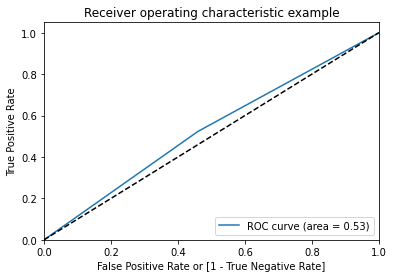

(array([0.        , 0.45957149, 1.        ]),
 array([0.        , 0.52334419, 1.        ]),
 array([2, 1, 0]))

In [116]:
# Drawing ROC curve.

draw_roc(y_pred_final["Performance Tag_y"], y_pred_final["predicted"])

**Finding optimal threshold value.**

<AxesSubplot:xlabel='prob'>

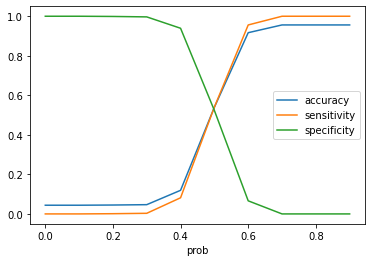

In [117]:
# Let's create columns with different probability cutoffs .

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_pred_final[i]= y_pred_final.Default_Prob.map(lambda x: 1 if x > i else 0)
    
# Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final["Performance Tag_y"], y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]

# Let's plot accuracy, sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x = 'prob', y = ['accuracy','sensitivity','specificity'])

# From the plot, optimal threshold = 0.5.

In [118]:
# Using optimal threshold value to predict test data.

y_pred_final['final_predicted'] = y_pred_final.Default_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_pred_final

,Performance Tag_y,Application ID,Default_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,46481,0.550340,1,1,1,1,1,1,1,0,0,0,0,1
1,0.0,36074,0.513798,1,1,1,1,1,1,1,0,0,0,0,1
2,0.0,35111,0.472870,0,1,1,1,1,1,0,0,0,0,0,0
3,0.0,44892,0.609702,1,1,1,1,1,1,1,1,0,0,0,1
4,0.0,15753,0.471450,0,1,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20939,0.0,357,0.426119,0,1,1,1,1,1,0,0,0,0,0,0
20940,0.0,11592,0.459059,0,1,1,1,1,1,0,0,0,0,0,0
20941,0.0,31658,0.455533,0,1,1,1,1,1,0,0,0,0,0,0
20942,0.0,51541,0.482542,0,1,1,1,1,1,0,0,0,0,0,0


In [119]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final["Performance Tag_y"], y_pred_final["final_predicted"])

0.5396772345301757

In [120]:
# Creating confusion matrix.

confusion = metrics.confusion_matrix(y_pred_final["Performance Tag_y"], y_pred_final["final_predicted"])

confusion

array([[10821,  9202],
       [  439,   482]])

In [121]:
# Calculating TP, TN, FP and FN.

TP = confusion[0,0] # true positive 

TN = confusion[1,1] # true negatives

FP = confusion[0,1] # false positives

FN = confusion[1,0] # false negatives

In [122]:
# Let's see the sensitivity of our logistic regression model.

TP / float(TP+FN)

0.9610124333925399

In [123]:
# Let us calculate specificity.

TN / float(TN+FP)

0.04977282114828583

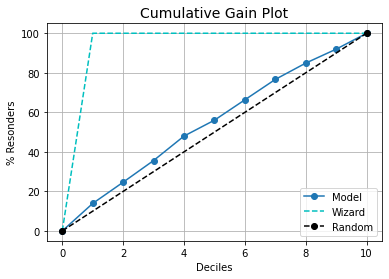

In [124]:
# Plotting Cumulative Gain Plot.

kds.metrics.plot_cumulative_gain(y_pred_final["Performance Tag_y"], y_pred_final["Default_Prob"])

# By the 4th decile, the model is able to identify only 50% of defaulters.

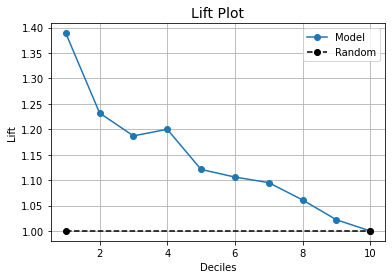

In [125]:
# Plotting Lift Plot.

kds.metrics.plot_lift(y_pred_final["Performance Tag_y"], y_pred_final["Default_Prob"])

# In the 4th decile, the lift is 1.2 which indicates that we have 1.2 times advantage over a random model.

Accuracy = 53.96%

Sensitivity = 96.10%

Specificity = 4.97%

% Gain = 50 at 4th decile

Lift = 1.20

Model built on only demographic data is not performing well as it can capture only 50% of defaulters.
Hence in further analysis, models will be built on data containing both demographic and credit bureau data.


### **Building models on master data that contains both demographic and credit bureau data.**

### **1. Building Logistic Regression model on master data.**

In [126]:
# Storing "Performance Tag_y" in "y" and other variables in "X".

y = master_woe['Performance Tag_y']

X = master_woe.drop(['Performance Tag_y'], axis = 1)

In [127]:
# Splitting X anf y into train and test data.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [128]:
# Checking class distribution.

counter = Counter(y_train)

counter

# Data is imbalanced.

Counter({0.0: 46840, 1.0: 2027})

In [129]:
# Balancing data by applying SMOTE.

oversample = SMOTE()

X_train, y_train = oversample.fit_resample(X_train, y_train)

In [130]:
# Checking no. of classes after applying SMOTE.

counter = Counter(y_train)

counter

# Data is balanced.

Counter({0.0: 46840, 1.0: 46840})

In [131]:
# Extracting imp_cols from X_test.

new_test = X_test[imp_cols]

new_test

,No of trades opened in last 12 months,No of trades opened in last 6 months,Total No of Trades,No of times 30 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of Inquiries in last 12 months (excluding home & auto loans),No of times 30 DPD or worse in last 6 months,Avgas CC Utilization in last 12 months,Outstanding Balance,No of times 90 DPD or worse in last 6 months
46481,-0.86663,-0.544238,-0.687516,-0.269700,-0.201328,0.183510,-0.198286,0.514430,-0.441668,-0.261481
36074,0.36761,0.304376,0.331685,-0.269700,-0.201328,0.367410,-0.198286,-0.801162,0.413699,-0.261481
35111,0.36761,0.304376,0.331685,-0.269700,-0.201328,0.367410,-0.198286,-0.059656,0.413699,-0.261481
44892,-0.86663,-0.544238,-0.687516,-0.269700,-0.201328,0.183510,-0.198286,0.514430,-0.441668,0.588083
15753,-0.86663,-0.544238,-0.687516,-0.269700,-0.201328,-0.829725,-0.198286,-0.801162,-0.144491,-0.261481
...,...,...,...,...,...,...,...,...,...,...
357,-0.86663,-0.544238,-0.687516,-0.269700,-0.201328,-0.829725,-0.198286,-0.801162,-0.144491,-0.261481
11592,-0.86663,-0.544238,-0.687516,-0.269700,-0.201328,-0.829725,-0.198286,-0.801162,-0.441668,-0.261481
31658,0.36761,0.304376,0.331685,-0.269700,-0.201328,0.367410,-0.198286,-0.059656,-0.144491,-0.261481
51541,0.36761,0.326435,0.331685,0.711146,0.695294,0.183510,0.741973,0.514430,0.413699,0.588083


In [132]:
# Storing X_train and new_test in different variables for further model building.

train_dt = X_train

train_rf = X_train

train_nb = X_train

test_rf = new_test

test_dt = new_test

test_nb = new_test

In [133]:
# Building logistic regression model_1.

model_1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial()).fit()

print(model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Performance Tag_y   No. Observations:                93680
Model:                            GLM   Df Residuals:                    93669
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -59751.
Date:                Mon, 23 Aug 2021   Deviance:                   1.1950e+05
Time:                        10:39:42   Pearson chi2:                 9.37e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

In [134]:
# Calculating VIF.

VIF = Cal_VIF(X_train)

VIF

,Features,VIF
0,No of trades opened in last 12 months,5.58
2,Total No of Trades,4.71
3,No of times 30 DPD or worse in last 12 months,4.08
6,No of times 30 DPD or worse in last 6 months,4.07
1,No of trades opened in last 6 months,3.15
4,No of times 60 DPD or worse in last 12 months,2.96
9,No of times 90 DPD or worse in last 6 months,2.48
5,No of Inquiries in last 12 months (excluding h...,2.33
7,Avgas CC Utilization in last 12 months,1.69
8,Outstanding Balance,1.64


In [135]:
# Removing "No of times 30 DPD or worse in last 6 months".

X_train = X_train.drop("No of times 30 DPD or worse in last 6 months", axis = 1)

In [136]:
# Building logistic regression model_2.

model_2 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial()).fit()

print(model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Performance Tag_y   No. Observations:                93680
Model:                            GLM   Df Residuals:                    93670
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -59754.
Date:                Mon, 23 Aug 2021   Deviance:                   1.1951e+05
Time:                        10:40:03   Pearson chi2:                 9.37e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

In [137]:
# Calculating VIF.

VIF = Cal_VIF(X_train)

VIF

,Features,VIF
0,No of trades opened in last 12 months,5.58
2,Total No of Trades,4.71
1,No of trades opened in last 6 months,3.15
4,No of times 60 DPD or worse in last 12 months,2.67
3,No of times 30 DPD or worse in last 12 months,2.65
8,No of times 90 DPD or worse in last 6 months,2.44
5,No of Inquiries in last 12 months (excluding h...,2.33
6,Avgas CC Utilization in last 12 months,1.68
7,Outstanding Balance,1.64


In [138]:
# Removing "No of trades opened in last 6 months".

X_train = X_train.drop("No of trades opened in last 6 months", axis = 1)

In [139]:
# Building logistic regression model_3.

model_3 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial()).fit()

print(model_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Performance Tag_y   No. Observations:                93680
Model:                            GLM   Df Residuals:                    93671
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -59754.
Date:                Mon, 23 Aug 2021   Deviance:                   1.1951e+05
Time:                        10:40:18   Pearson chi2:                 9.37e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

In [140]:
# Calculating VIF.

VIF = Cal_VIF(X_train)

VIF

,Features,VIF
0,No of trades opened in last 12 months,5.19
1,Total No of Trades,4.11
3,No of times 60 DPD or worse in last 12 months,2.67
2,No of times 30 DPD or worse in last 12 months,2.65
7,No of times 90 DPD or worse in last 6 months,2.44
4,No of Inquiries in last 12 months (excluding h...,2.32
5,Avgas CC Utilization in last 12 months,1.68
6,Outstanding Balance,1.63


In [141]:
# Removing "No of times 60 DPD or worse in last 12 months".

X_train = X_train.drop("No of times 60 DPD or worse in last 12 months", axis = 1)

In [142]:
# Building logistic regression model_4.

model_4 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial()).fit()

print(model_4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Performance Tag_y   No. Observations:                93680
Model:                            GLM   Df Residuals:                    93672
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -59758.
Date:                Mon, 23 Aug 2021   Deviance:                   1.1952e+05
Time:                        10:40:37   Pearson chi2:                 9.37e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

In [143]:
# Calculating VIF.

VIF = Cal_VIF(X_train)

VIF

,Features,VIF
0,No of trades opened in last 12 months,5.19
1,Total No of Trades,4.11
3,No of Inquiries in last 12 months (excluding h...,2.32
2,No of times 30 DPD or worse in last 12 months,2.07
6,No of times 90 DPD or worse in last 6 months,2.05
4,Avgas CC Utilization in last 12 months,1.68
5,Outstanding Balance,1.63


In [144]:
# Removing "No of trades opened in last 12 months".

X_train = X_train.drop("No of trades opened in last 12 months", axis = 1)

In [145]:
# Building logistic regression model_5.

model_5 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial()).fit()

print(model_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Performance Tag_y   No. Observations:                93680
Model:                            GLM   Df Residuals:                    93673
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -59891.
Date:                Mon, 23 Aug 2021   Deviance:                   1.1978e+05
Time:                        10:40:54   Pearson chi2:                 9.36e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

In [146]:
# Calculating VIF.

VIF = Cal_VIF(X_train)

VIF

,Features,VIF
0,Total No of Trades,2.25
1,No of times 30 DPD or worse in last 12 months,2.06
5,No of times 90 DPD or worse in last 6 months,2.05
2,No of Inquiries in last 12 months (excluding h...,2.02
4,Outstanding Balance,1.60
3,Avgas CC Utilization in last 12 months,1.59


In [147]:
# Removing "Outstanding Balance".

X_train = X_train.drop("Outstanding Balance", axis = 1)

In [148]:
# Building logistic regression model_6.

model_6 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial()).fit()

print(model_6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Performance Tag_y   No. Observations:                93680
Model:                            GLM   Df Residuals:                    93674
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -59895.
Date:                Mon, 23 Aug 2021   Deviance:                   1.1979e+05
Time:                        10:41:13   Pearson chi2:                 9.36e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

In [149]:
# Calculating VIF.

VIF = Cal_VIF(X_train)

VIF

,Features,VIF
1,No of times 30 DPD or worse in last 12 months,2.05
4,No of times 90 DPD or worse in last 6 months,2.04
2,No of Inquiries in last 12 months (excluding h...,2.02
0,Total No of Trades,1.98
3,Avgas CC Utilization in last 12 months,1.51


In [150]:
# Dropping the varibles in test data that were removed during variable selection from train data.

new_test = new_test.drop(['No of trades opened in last 12 months', 
       'No of trades opened in last 6 months', 'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 6 months', 'Outstanding Balance'], axis = 1)

In [151]:
# Building final logistic regression model for the purpose of predicting the test data.

log_model = LogisticRegression()

log_model.fit(X_train, y_train)

LogisticRegression()

In [152]:
# Using log_model for predicting test data and storing predictions as "y_pred".

y_pred = log_model.predict_proba(new_test)

In [153]:
# Converting y_pred to dataframe.

y_pred_df = pd.DataFrame(y_pred)

# Converting to column dataframe.

y_pred_1 = y_pred_df.iloc[:,[1]]

# Converting y_test to dataframe.

y_test_df = pd.DataFrame(y_test)

# Creating "Application ID" column.

y_test_df['Application ID'] = y_test_df.index

# Setting indices.

y_pred_1.reset_index(drop = True, inplace = True)

y_test_df.reset_index(drop = True, inplace = True)

# Appending y_test_df and y_pred_1.

y_pred_final = pd.concat([y_test_df, y_pred_1], axis = 1)

# Renaming the column.

y_pred_final = y_pred_final.rename(columns = { 1 : 'Default_Prob'})

y_pred_final

,Performance Tag_y,Application ID,Default_Prob
0,0.0,46481,0.517760
1,0.0,36074,0.398622
2,0.0,35111,0.512305
3,0.0,44892,0.555116
4,0.0,15753,0.228683
...,...,...,...
20939,0.0,357,0.228683
20940,0.0,11592,0.228683
20941,0.0,31658,0.512305
20942,0.0,51541,0.700471


In [154]:
# Creating new column 'predicted' with 1 if Default_Prob > 0.5 else 0.

y_pred_final['predicted'] = y_pred_final.Default_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_pred_final

,Performance Tag_y,Application ID,Default_Prob,predicted
0,0.0,46481,0.517760,1
1,0.0,36074,0.398622,0
2,0.0,35111,0.512305,1
3,0.0,44892,0.555116,1
4,0.0,15753,0.228683,0
...,...,...,...,...
20939,0.0,357,0.228683,0
20940,0.0,11592,0.228683,0
20941,0.0,31658,0.512305,1
20942,0.0,51541,0.700471,1


In [155]:
# Creating confusion matrix.

confusion = metrics.confusion_matrix(y_pred_final["Performance Tag_y"], y_pred_final["predicted"])

confusion

array([[10835,  9188],
       [  280,   641]])

In [156]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final["Performance Tag_y"], y_pred_final["predicted"])

0.5479373567608862

In [157]:
# Calculating TP, TN, FP and FN.

TP = confusion[0,0] # true positive 

TN = confusion[1,1] # true negatives

FP = confusion[0,1] # false positives

FN = confusion[1,0] # false negatives

In [158]:
# Let's see the sensitivity of our logistic regression model.

TP / float(TP+FN)

0.9748088169140801

In [159]:
# Let us calculate specificity.

TN / float(TN+FP)

0.06521517957065825

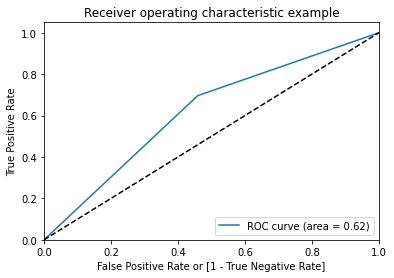

(array([0.       , 0.4588723, 1.       ]),
 array([0.        , 0.69598263, 1.        ]),
 array([2, 1, 0]))

In [160]:
# Drawing ROC curve.

draw_roc(y_pred_final["Performance Tag_y"], y_pred_final["predicted"])

<AxesSubplot:xlabel='prob'>

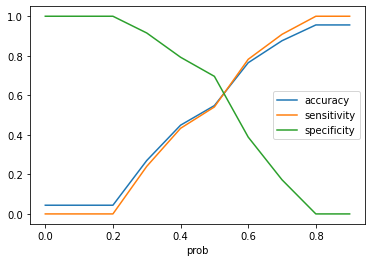

In [161]:
# Let's create columns with different probability cutoffs .

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_pred_final[i]= y_pred_final.Default_Prob.map(lambda x: 1 if x > i else 0)
    
# Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final["Performance Tag_y"], y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]

# Let's plot accuracy, sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x = 'prob', y = ['accuracy','sensitivity','specificity'])

# From the plot, optimal threshold = 0.5.


In [162]:
# Using optimal threshold value to predict test data.

y_pred_final['final_predicted'] = y_pred_final.Default_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_pred_final

,Performance Tag_y,Application ID,Default_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,46481,0.517760,1,1,1,1,1,1,1,0,0,0,0,1
1,0.0,36074,0.398622,0,1,1,1,1,0,0,0,0,0,0,0
2,0.0,35111,0.512305,1,1,1,1,1,1,1,0,0,0,0,1
3,0.0,44892,0.555116,1,1,1,1,1,1,1,0,0,0,0,1
4,0.0,15753,0.228683,0,1,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20939,0.0,357,0.228683,0,1,1,1,0,0,0,0,0,0,0,0
20940,0.0,11592,0.228683,0,1,1,1,0,0,0,0,0,0,0,0
20941,0.0,31658,0.512305,1,1,1,1,1,1,1,0,0,0,0,1
20942,0.0,51541,0.700471,1,1,1,1,1,1,1,1,1,0,0,1


In [163]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final["Performance Tag_y"], y_pred_final["final_predicted"])

0.5479373567608862

In [164]:
# Creating confusion matrix.

confusion = metrics.confusion_matrix(y_pred_final["Performance Tag_y"], y_pred_final["final_predicted"])

confusion

array([[10835,  9188],
       [  280,   641]])

In [165]:
# Calculating TP, TN, FP and FN.

TP = confusion[0,0] # true positive 

TN = confusion[1,1] # true negatives

FP = confusion[0,1] # false positives

FN = confusion[1,0] # false negatives

In [166]:
# Let's see the sensitivity of our logistic regression model.

TP / float(TP+FN)

0.9748088169140801

In [167]:
# Let us calculate specificity.

TN / float(TN+FP)

0.06521517957065825

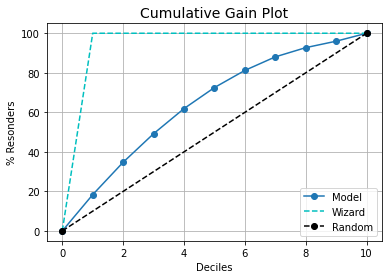

In [168]:
# Plotting Cumulative Gain Plot.

kds.metrics.plot_cumulative_gain(y_pred_final["Performance Tag_y"], y_pred_final["Default_Prob"])

# By the 5th decile, the model is able to identify 75% of defaulters.

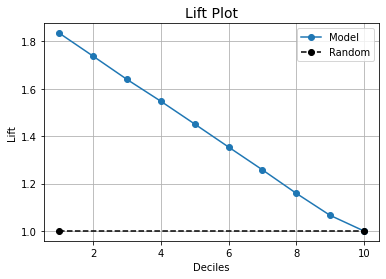

In [169]:
# Plotting Lift Plot.

kds.metrics.plot_lift(y_pred_final["Performance Tag_y"], y_pred_final["Default_Prob"])

# In the 5th decile, the lift is 1.5 which indicates that we have 1.5 times advantage over a random model.

### **2. Building Decision Tree Classifier on master data.**

In [170]:
# Building decision tree classifier.

clf = DecisionTreeClassifier()

clf = clf.fit(train_dt, y_train)

In [171]:
# Predicting test data.

y_pred = clf.predict_proba(test_dt)

In [172]:
# Converting y_pred to dataframe.

y_pred_df = pd.DataFrame(y_pred)

# Converting to column dataframe.

y_pred_1 = y_pred_df.iloc[:,[1]]

# Converting y_test to dataframe.

y_test_df = pd.DataFrame(y_test)

# Creating "Application ID" column.

y_test_df['Application ID'] = y_test_df.index

# Setting indices.

y_pred_1.reset_index(drop = True, inplace = True)

y_test_df.reset_index(drop = True, inplace = True)

# Appending y_test_df and y_pred_1.

y_pred_final = pd.concat([y_test_df, y_pred_1],axis = 1)

# Renaming the column.

y_pred_final = y_pred_final.rename(columns = { 1 : 'Default_Prob'})

y_pred_final

,Performance Tag_y,Application ID,Default_Prob
0,0.0,46481,0.535912
1,0.0,36074,0.408556
2,0.0,35111,0.473957
3,0.0,44892,0.450382
4,0.0,15753,0.204524
...,...,...,...
20939,0.0,357,0.204524
20940,0.0,11592,0.238132
20941,0.0,31658,0.459296
20942,0.0,51541,0.663866


In [173]:
# Creating new column 'predicted' with 1 if Default_Prob > 0.5 else 0.

y_pred_final['predicted'] = y_pred_final.Default_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_pred_final

,Performance Tag_y,Application ID,Default_Prob,predicted
0,0.0,46481,0.535912,1
1,0.0,36074,0.408556,0
2,0.0,35111,0.473957,0
3,0.0,44892,0.450382,0
4,0.0,15753,0.204524,0
...,...,...,...,...
20939,0.0,357,0.204524,0
20940,0.0,11592,0.238132,0
20941,0.0,31658,0.459296,0
20942,0.0,51541,0.663866,1


In [174]:
# Creating confusion matrix.

confusion = metrics.confusion_matrix(y_pred_final["Performance Tag_y"], y_pred_final["predicted"])

confusion

array([[14960,  5063],
       [  571,   350]])

In [175]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final["Performance Tag_y"], y_pred_final["predicted"])

0.7309969442322384

In [176]:
# Calculating TP, TN, FP and FN.

TP = confusion[0,0] # true positive 

TN = confusion[1,1] # true negatives

FP = confusion[0,1] # false positives

FN = confusion[1,0] # false negatives

In [177]:
# Let's see the sensitivity of our model.

TP / float(TP+FN)

0.9632348206812182

In [178]:
# Let us calculate specificity.

TN / float(TN+FP)

0.06465915388878625

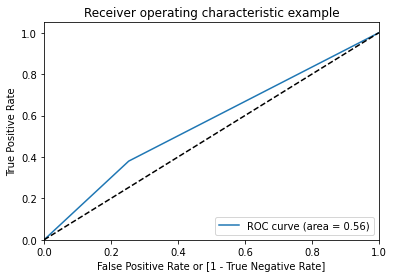

(array([0.        , 0.25285921, 1.        ]),
 array([0.        , 0.38002172, 1.        ]),
 array([2, 1, 0]))

In [179]:
# Drawing ROC curve.

draw_roc(y_pred_final["Performance Tag_y"], y_pred_final["predicted"])

<AxesSubplot:xlabel='prob'>

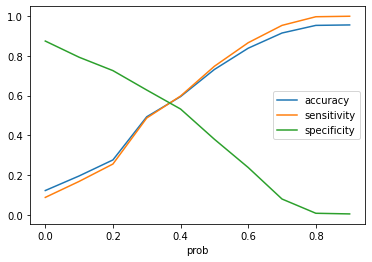

In [180]:
# Let's create columns with different probability cutoffs.

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_pred_final[i]= y_pred_final.Default_Prob.map(lambda x: 1 if x > i else 0)

# Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final["Performance Tag_y"], y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
    
# Let's plot accuracy, sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x = 'prob', y = ['accuracy','sensitivity','specificity'])

# From the plot, optimal threshold = 0.38.

In [181]:
# Using optimal threshold value to predict test data.

y_pred_final['final_predicted'] = y_pred_final.Default_Prob.map(lambda x: 1 if x > 0.38 else 0)

y_pred_final

,Performance Tag_y,Application ID,Default_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,46481,0.535912,1,1,1,1,1,1,1,0,0,0,0,1
1,0.0,36074,0.408556,0,1,1,1,1,1,0,0,0,0,0,1
2,0.0,35111,0.473957,0,1,1,1,1,1,0,0,0,0,0,1
3,0.0,44892,0.450382,0,1,1,1,1,1,0,0,0,0,0,1
4,0.0,15753,0.204524,0,1,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20939,0.0,357,0.204524,0,1,1,1,0,0,0,0,0,0,0,0
20940,0.0,11592,0.238132,0,1,1,1,0,0,0,0,0,0,0,0
20941,0.0,31658,0.459296,0,1,1,1,1,1,0,0,0,0,0,1
20942,0.0,51541,0.663866,1,1,1,1,1,1,1,1,0,0,0,1


In [182]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final["Performance Tag_y"], y_pred_final["final_predicted"])

0.5605901451489687

In [183]:
# Creating confusion matrix.

confusion = metrics.confusion_matrix(y_pred_final["Performance Tag_y"], y_pred_final["final_predicted"])

confusion

array([[11222,  8801],
       [  402,   519]])

In [184]:
# Calculating TP, TN, FP and FN.

TP = confusion[0,0] # true positive 

TN = confusion[1,1] # true negatives

FP = confusion[0,1] # false positives

FN = confusion[1,0] # false negatives

In [185]:
# Let's see the sensitivity of our model.

TP / float(TP+FN)

0.9654163799036476

In [186]:
# Let us calculate specificity.

TN / float(TN+FP)

0.05568669527896996

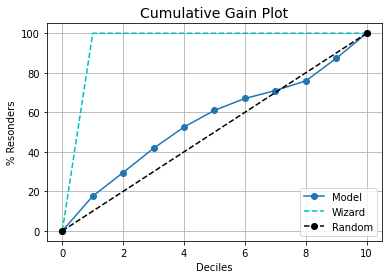

In [187]:
# Plotting Cumulative Gain Plot.

kds.metrics.plot_cumulative_gain(y_pred_final["Performance Tag_y"], y_pred_final["Default_Prob"])

# By the 5th decile, the model is able to identify 60% of defaulters.

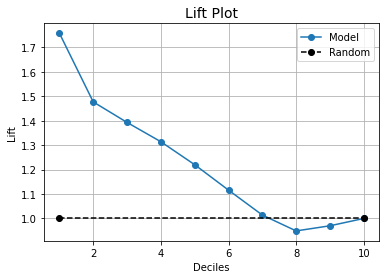

In [188]:
# Plotting Lift Plot.

kds.metrics.plot_lift(y_pred_final["Performance Tag_y"], y_pred_final["Default_Prob"])

# In the 5th decile, the lift is 1.2 which indicates that we have 1.2 times advantage over a random model.

### **3. Building Randomforest Classifier on master data.**

In [189]:
# Building randomforest classifier.

clf = RandomForestClassifier()

clf = clf.fit(train_rf, y_train)

In [190]:
# Predicting test data.

y_pred = clf.predict_proba(test_rf)

In [191]:
# Converting y_pred to dataframe.

y_pred_df = pd.DataFrame(y_pred)

# Converting to column dataframe.

y_pred_1 = y_pred_df.iloc[:,[1]]

# Converting y_test to dataframe.

y_test_df = pd.DataFrame(y_test)

# Creating "Application ID" column.

y_test_df['Application ID'] = y_test_df.index

# Setting indices.

y_pred_1.reset_index(drop = True, inplace = True)

y_test_df.reset_index(drop = True, inplace = True)

# Appending y_test_df and y_pred_1.

y_pred_final = pd.concat([y_test_df, y_pred_1],axis = 1)

# Renaming the column.

y_pred_final = y_pred_final.rename(columns = { 1 : 'Default_Prob'})

In [192]:
# Creating new column 'predicted' with 1 if Default_Prob > 0.5 else 0.

y_pred_final['predicted'] = y_pred_final.Default_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_pred_final

,Performance Tag_y,Application ID,Default_Prob,predicted
0,0.0,46481,0.534566,1
1,0.0,36074,0.406768,0
2,0.0,35111,0.474356,0
3,0.0,44892,0.454521,0
4,0.0,15753,0.204735,0
...,...,...,...,...
20939,0.0,357,0.204735,0
20940,0.0,11592,0.238026,0
20941,0.0,31658,0.459610,0
20942,0.0,51541,0.661924,1


In [193]:
# Creating confusion matrix.

confusion = metrics.confusion_matrix(y_pred_final["Performance Tag_y"], y_pred_final["predicted"])

confusion

array([[14967,  5056],
       [  573,   348]])

In [194]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final["Performance Tag_y"], y_pred_final["predicted"])

0.7312356760886173

In [195]:
# Calculating TP, TN, FP and FN.

TP = confusion[0,0] # true positive 

TN = confusion[1,1] # true negatives

FP = confusion[0,1] # false positives

FN = confusion[1,0] # false negatives

In [196]:
# Let's see the sensitivity of our model.

TP / float(TP+FN)

0.9631274131274131

In [197]:
# Let us calculate specificity.

TN / float(TN+FP)

0.06439674315321983

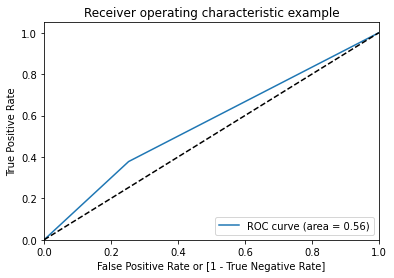

(array([0.        , 0.25250961, 1.        ]),
 array([0.        , 0.37785016, 1.        ]),
 array([2, 1, 0]))

In [198]:
# Drawing ROC curve.

draw_roc(y_pred_final["Performance Tag_y"], y_pred_final["predicted"])

<AxesSubplot:xlabel='prob'>

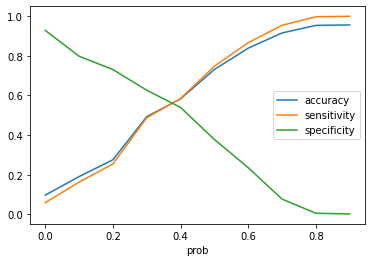

In [199]:
# Let's create columns with different probability cutoffs .

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_pred_final[i]= y_pred_final.Default_Prob.map(lambda x: 1 if x > i else 0)

# Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final["Performance Tag_y"], y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
    
# Let's plot accuracy, sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])

# From the plot, optimal threshold = 0.38.
    

In [200]:
# Using optimal threshold value to predict test data.

y_pred_final['final_predicted'] = y_pred_final.Default_Prob.map(lambda x: 1 if x > 0.38 else 0)

y_pred_final

,Performance Tag_y,Application ID,Default_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,46481,0.534566,1,1,1,1,1,1,1,0,0,0,0,1
1,0.0,36074,0.406768,0,1,1,1,1,1,0,0,0,0,0,1
2,0.0,35111,0.474356,0,1,1,1,1,1,0,0,0,0,0,1
3,0.0,44892,0.454521,0,1,1,1,1,1,0,0,0,0,0,1
4,0.0,15753,0.204735,0,1,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20939,0.0,357,0.204735,0,1,1,1,0,0,0,0,0,0,0,0
20940,0.0,11592,0.238026,0,1,1,1,0,0,0,0,0,0,0,0
20941,0.0,31658,0.459610,0,1,1,1,1,1,0,0,0,0,0,1
20942,0.0,51541,0.661924,1,1,1,1,1,1,1,1,0,0,0,1


In [201]:
# Let's check the overall accuracy.

metrics.accuracy_score( y_pred_final["Performance Tag_y"], y_pred_final["final_predicted"])

0.5612585943468297

In [202]:
# Creating confusion matrix.

confusion = metrics.confusion_matrix(y_pred_final["Performance Tag_y"], y_pred_final["final_predicted"])

confusion

array([[11236,  8787],
       [  402,   519]])

In [203]:
# Calculating TP, TN, FP and FN.

TP = confusion[0,0] # true positive 

TN = confusion[1,1] # true negatives

FP = confusion[0,1] # false positives

FN = confusion[1,0] # false negatives

In [204]:
# Let's see the sensitivity of our model.

TP / float(TP+FN)

0.965457982471215

In [205]:
# Let us calculate specificity.

TN / float(TN+FP)

0.05577047066408768

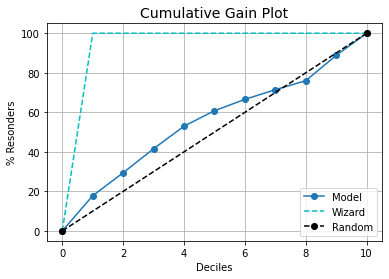

In [206]:
# Plotting Cumulative Gain Plot.

kds.metrics.plot_cumulative_gain(y_pred_final["Performance Tag_y"], y_pred_final["Default_Prob"])

# By the 5th decile, the model is able to identify 60% of defaulters.

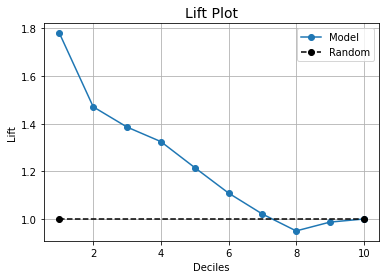

In [207]:
# Plotting Lift Plot.

kds.metrics.plot_lift(y_pred_final["Performance Tag_y"], y_pred_final["Default_Prob"])

# In the 5th decile, the lift is 1.2 which indicates that we have 1.2 times advantage over a random model.

### **4. Building Naive Bayes Classifier on master data.**

In [208]:
# Building Naive Bayes Classifier.

clf = GaussianNB()

clf = clf.fit(train_nb, y_train)

In [209]:
# Predicting test data.

y_pred = clf.predict_proba(test_nb)

In [210]:
# Converting y_pred to dataframe.

y_pred_df = pd.DataFrame(y_pred)

# Converting to column dataframe.

y_pred_1 = y_pred_df.iloc[:,[1]]

# Converting y_test to dataframe.

y_test_df = pd.DataFrame(y_test)

# Creating "Application ID" column.

y_test_df['Application ID'] = y_test_df.index

# Setting indices.

y_pred_1.reset_index(drop = True, inplace = True)

y_test_df.reset_index(drop = True, inplace = True)

# Appending y_test_df and y_pred_1.

y_pred_final = pd.concat([y_test_df, y_pred_1],axis = 1)

# Renaming the column.

y_pred_final= y_pred_final.rename(columns={ 1 : 'Default_Prob'})

y_pred_final


,Performance Tag_y,Application ID,Default_Prob
0,0.0,46481,0.008584
1,0.0,36074,0.396990
2,0.0,35111,0.683491
3,0.0,44892,0.029924
4,0.0,15753,0.000275
...,...,...,...
20939,0.0,357,0.000275
20940,0.0,11592,0.000199
20941,0.0,31658,0.539355
20942,0.0,51541,0.999674


In [211]:
# Creating new column 'predicted' with 1 if Default_Prob > 0.5 else 0.

y_pred_final['predicted'] = y_pred_final.Default_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_pred_final

,Performance Tag_y,Application ID,Default_Prob,predicted
0,0.0,46481,0.008584,0
1,0.0,36074,0.396990,0
2,0.0,35111,0.683491,1
3,0.0,44892,0.029924,0
4,0.0,15753,0.000275,0
...,...,...,...,...
20939,0.0,357,0.000275,0
20940,0.0,11592,0.000199,0
20941,0.0,31658,0.539355,1
20942,0.0,51541,0.999674,1


In [212]:
# Creating confusion matrix.

confusion = metrics.confusion_matrix(y_pred_final["Performance Tag_y"], y_pred_final["predicted"])

confusion

array([[11345,  8678],
       [  304,   617]])

In [213]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final["Performance Tag_y"], y_pred_final["predicted"])

0.5711420932009167

In [214]:
# Calculating TP, TN, FP and FN.

TP = confusion[0,0] # true positive 

TN = confusion[1,1] # true negatives

FP = confusion[0,1] # false positives

FN = confusion[1,0] # false negatives

In [215]:
# Let's see the sensitivity of our model.

TP / float(TP+FN)

0.9739033393424328

In [216]:
# Let us calculate specificity.

TN / float(TN+FP)

0.06637977407208176

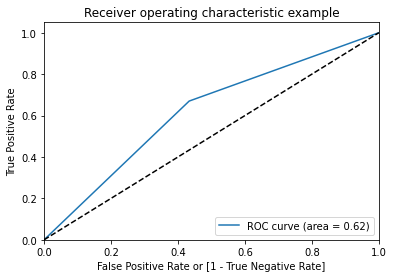

(array([0.        , 0.43340159, 1.        ]),
 array([0.      , 0.669924, 1.      ]),
 array([2, 1, 0]))

In [217]:
# Drawing ROC curve.

draw_roc(y_pred_final["Performance Tag_y"], y_pred_final["predicted"])

<AxesSubplot:xlabel='prob'>

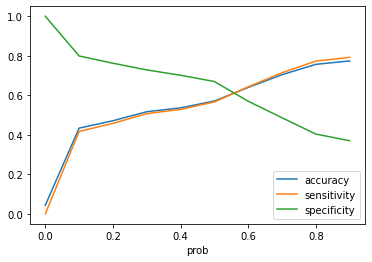

In [218]:
# Let's create columns with different probability cutoffs .

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_pred_final[i]= y_pred_final.Default_Prob.map(lambda x: 1 if x > i else 0)

# Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final["Performance Tag_y"], y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]

# Let's plot accuracy, sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x = 'prob', y = ['accuracy','sensitivity','specificity'])

# From the plot, optimal threshold = 0.59.

In [219]:
# Using optimal threshold value to predict test data.

y_pred_final['final_predicted'] = y_pred_final.Default_Prob.map(lambda x: 1 if x > 0.59 else 0)

y_pred_final

,Performance Tag_y,Application ID,Default_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,46481,0.008584,0,1,0,0,0,0,0,0,0,0,0,0
1,0.0,36074,0.396990,0,1,1,1,1,0,0,0,0,0,0,0
2,0.0,35111,0.683491,1,1,1,1,1,1,1,1,0,0,0,1
3,0.0,44892,0.029924,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,15753,0.000275,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20939,0.0,357,0.000275,0,1,0,0,0,0,0,0,0,0,0,0
20940,0.0,11592,0.000199,0,1,0,0,0,0,0,0,0,0,0,0
20941,0.0,31658,0.539355,1,1,1,1,1,1,1,0,0,0,0,0
20942,0.0,51541,0.999674,1,1,1,1,1,1,1,1,1,1,1,1


In [220]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final["Performance Tag_y"], y_pred_final["final_predicted"])

0.6394671504965622

In [221]:
# Creating confusion matrix.

confusion = metrics.confusion_matrix(y_pred_final["Performance Tag_y"], y_pred_final["final_predicted"])

confusion

array([[12866,  7157],
       [  394,   527]])

In [222]:
# Let's see the sensitivity of our model.

TP / float(TP+FN)

0.9739033393424328

In [223]:
# Let us calculate specificity.

TN / float(TN+FP)

0.06637977407208176

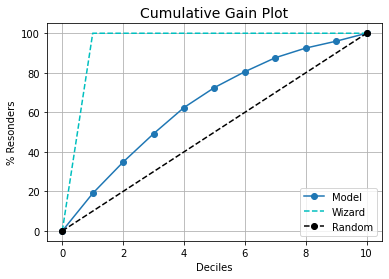

In [224]:
# Plotting Cumulative Gain Plot.

kds.metrics.plot_cumulative_gain(y_pred_final["Performance Tag_y"], y_pred_final["Default_Prob"])

# By the 5th decile, the model is able to identify 70% of defaulters.

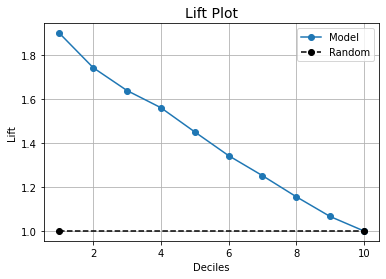

In [225]:
# Plotting Lift Plot.

kds.metrics.plot_lift(y_pred_final["Performance Tag_y"], y_pred_final["Default_Prob"])

# In the 5th decile, the lift is 1.42 which indicates that we have 1.42 times advantage over a random model.

### **Reject Inference**

In [226]:
# Labelling missing values in column "Performance Tag_y" in df "rejected" as default.

rejected["Performance Tag_y"] = rejected["Performance Tag_y"].fillna(1)

In [227]:
# Setting indices.

master_approved.reset_index(drop = True, inplace = True)

rejected.reset_index(drop = True, inplace = True)

In [228]:
# Combining approved and rejected data.

final_data = pd.concat([master_approved, rejected], axis = 1)

final_data

,Age,No of dependents,Income,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,...,Education_Phd,Education_Professional,Profession _SE,Profession _SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Owned,Type of residence_Rented,Presence of open home loan_1.0,Presence of open auto loan_1
0,48,2.0,40.0,113,56,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,31,4.0,55.0,112,46,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,32,2.0,46.0,104,49,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,43,1.0,53.0,94,53,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,35,5.0,44.0,112,43,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69806,44,3.0,15.0,6,3,1,2,4,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69807,24,1.0,4.5,20,7,0,1,2,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69808,33,4.0,6.0,37,25,0,1,2,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69809,52,3.0,4.5,76,57,2,2,4,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [229]:
# Removing duplicate columns.

final_data = final_data.loc[:,~final_data.columns.duplicated()]

In [230]:
# View final_data.

final_data

,Age,No of dependents,Income,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,...,Education_Professional,Profession _SE,Profession _SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Owned,Type of residence_Rented,Presence of open home loan_1.0,Presence of open home loan_nan,Presence of open auto loan_1
0,48,2.0,40.0,113,56,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,31,4.0,55.0,112,46,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,32,2.0,46.0,104,49,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
3,43,1.0,53.0,94,53,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,1
4,35,5.0,44.0,112,43,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69806,44,3.0,15.0,6,3,1,2,4,1,3,...,1,0,0,0,0,0,1,0,0,0
69807,24,1.0,4.5,20,7,0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
69808,33,4.0,6.0,37,25,0,1,2,1,3,...,0,0,1,0,0,0,1,1,0,0
69809,52,3.0,4.5,76,57,2,2,4,3,4,...,0,1,0,0,0,0,1,1,0,0


In [231]:
# Checking if there are any missing values.

final_data.isnull().sum()

Age                                                                   0
No of dependents                                                      2
Income                                                                0
No of months in current residence                                     0
No of months in current company                                       0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                             1018
No of trades opened in last 6 months                                  1
No of trades opened in last 12 months                           

In [232]:
# Splitting data into "X" and "y".

y = final_data["Performance Tag_y"]

X = final_data.drop(["Performance Tag_y"], axis = 1)

In [233]:
# Applying WOE transformation.

clf = WOE()

clf.fit(X, y)

print(clf.woe_df.head()) 

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


                            Variable_Name        Category  Count   Event  \
0                                     Age  (17.999, 40.0]  24577  1072.0   
1                                     Age    (40.0, 50.0]  22872   958.0   
2                                     Age    (50.0, 65.0]  22362   918.0   
3  Avgas CC Utilization in last 12 months  (-0.001, 10.0]  24531   476.0   
4  Avgas CC Utilization in last 12 months    (10.0, 32.0]  21389   853.0   

   Non_Event  Event_Rate  Non_Event_Rate  Event_Distribution  \
0    23505.0    0.043618        0.956382            0.363636   
1    21914.0    0.041885        0.958115            0.324966   
2    21444.0    0.041052        0.958948            0.311398   
3    24055.0    0.019404        0.980596            0.161465   
4    20536.0    0.039880        0.960120            0.289349   

   Non_Event_Distribution       WOE  Information_Value  
0                0.351540  0.033832           0.000708  
1                0.327745 -0.008514         

In [234]:
# Information value dataset.

IV = clf.iv_df 

In [235]:
# Converting IV to dataframe.

IV = pd.DataFrame(IV)

IV

,Variable_Name,Information_Value
1,Avgas CC Utilization in last 12 months,0.270385
22,No of trades opened in last 12 months,0.257714
9,No of Inquiries in last 12 months (excluding h...,0.229374
30,Total No of Trades,0.190222
16,No of times 30 DPD or worse in last 12 months,0.188798
23,No of trades opened in last 6 months,0.170194
21,No of times 90 DPD or worse in last 6 months,0.163373
17,No of times 30 DPD or worse in last 6 months,0.145354
18,No of times 60 DPD or worse in last 12 months,0.138378
24,Outstanding Balance,0.129008


In [236]:
# Calculationg strength of variables.

IV.loc[IV['Information_Value'] < 0.02, 'Strength'] = "Not useful"

IV.loc[(IV['Information_Value'] >= 0.02) & (IV['Information_Value'] < 0.1), 'Strength'] = "Weak predictor"

IV.loc[(IV['Information_Value'] >= 0.1) & (IV['Information_Value'] < 0.3), 'Strength'] = "Medium predictor"

IV.loc[(IV['Information_Value'] >= 0.3) & (IV['Information_Value'] < 0.5), 'Strength'] = "Strong predictor"

IV.loc[IV['Information_Value'] > 0.5, 'Strength'] = "Suspecious predictor"

In [237]:
# View IV df.

IV

,Variable_Name,Information_Value,Strength
1,Avgas CC Utilization in last 12 months,0.270385,Medium predictor
22,No of trades opened in last 12 months,0.257714,Medium predictor
9,No of Inquiries in last 12 months (excluding h...,0.229374,Medium predictor
30,Total No of Trades,0.190222,Medium predictor
16,No of times 30 DPD or worse in last 12 months,0.188798,Medium predictor
23,No of trades opened in last 6 months,0.170194,Medium predictor
21,No of times 90 DPD or worse in last 6 months,0.163373,Medium predictor
17,No of times 30 DPD or worse in last 6 months,0.145354,Medium predictor
18,No of times 60 DPD or worse in last 12 months,0.138378,Medium predictor
24,Outstanding Balance,0.129008,Medium predictor


In [238]:
# Extracting medium strength variables.

imp_var = IV.loc[IV['Strength'] == "Medium predictor"]

imp_var

,Variable_Name,Information_Value,Strength
1,Avgas CC Utilization in last 12 months,0.270385,Medium predictor
22,No of trades opened in last 12 months,0.257714,Medium predictor
9,No of Inquiries in last 12 months (excluding h...,0.229374,Medium predictor
30,Total No of Trades,0.190222,Medium predictor
16,No of times 30 DPD or worse in last 12 months,0.188798,Medium predictor
23,No of trades opened in last 6 months,0.170194,Medium predictor
21,No of times 90 DPD or worse in last 6 months,0.163373,Medium predictor
17,No of times 30 DPD or worse in last 6 months,0.145354,Medium predictor
18,No of times 60 DPD or worse in last 12 months,0.138378,Medium predictor
24,Outstanding Balance,0.129008,Medium predictor


In [239]:
# Storing names of important variables determined through IV analysis.

imp_cols = ["No of Inquiries in last 12 months (excluding home & auto loans)",    
"No of times 30 DPD or worse in last 12 months",                      
"No of trades opened in last 12 months",                              
"No of times 90 DPD or worse in last 6 months",                       
"No of times 30 DPD or worse in last 6 months",                      
"Avgas CC Utilization in last 12 months",                             
"Outstanding Balance",                                                
"No of trades opened in last 6 months",                               
"Total No of Trades",                                                 
"No of times 60 DPD or worse in last 12 months"]

In [240]:
# Storing "Performance Tag_y" as target.

target = final_data[["Performance Tag_y"]]

target

,Performance Tag_y
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
69806,0.0
69807,1.0
69808,0.0
69809,0.0


In [241]:
# Replacing original values with WOE values.

woe_data = clf.transform(X)

woe_data

,Age,No of dependents,Income,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,...,Education_Professional,Profession _SE,Profession _SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Owned,Type of residence_Rented,Presence of open home loan_1.0,Presence of open home loan_nan,Presence of open auto loan_1
0,-0.008514,-0.020399,-0.254137,0.084051,-0.113212,-0.261481,-0.121278,-0.198286,-0.134356,-0.201328,...,0.009760,-0.024255,0.004430,-0.001942,0.001193,-0.000618,-0.003976,-0.237951,0.001239,0.012010
1,0.033832,0.019791,-0.254137,0.084051,-0.113212,-0.261481,-0.121278,-0.198286,-0.134356,-0.201328,...,-0.018438,-0.024255,-0.014747,-0.001942,0.001193,-0.000618,-0.003976,0.072047,0.001239,0.012010
2,0.033832,-0.020399,-0.254137,0.084051,-0.113212,-0.261481,-0.121278,-0.198286,-0.134356,-0.201328,...,0.009760,-0.024255,-0.014747,-0.001942,0.001193,-0.000618,-0.003976,-0.237951,0.001239,0.012010
3,-0.008514,-0.020399,-0.254137,0.084051,-0.113212,-0.261481,-0.121278,-0.198286,-0.134356,-0.201328,...,0.009760,0.092319,0.004430,-0.001942,0.001193,-0.000618,-0.003976,-0.237951,0.001239,-0.138683
4,0.033832,0.005274,-0.254137,0.084051,-0.062451,-0.261481,-0.121278,-0.198286,-0.134356,-0.201328,...,-0.018438,-0.024255,0.004430,-0.001942,0.001193,-0.000618,-0.003976,-0.237951,0.001239,0.012010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69806,-0.008514,0.019791,0.189144,-0.043632,0.155488,0.588083,0.742705,0.741973,-0.134356,0.695294,...,-0.018438,-0.024255,0.004430,-0.001942,0.001193,-0.000618,-0.003976,0.072047,0.001239,0.012010
69807,0.033832,-0.020399,0.189144,-0.043632,0.155488,-0.261481,-0.121278,0.741973,-0.134356,-0.201328,...,0.009760,-0.024255,0.004430,-0.001942,0.001193,0.002463,0.011744,-0.237951,0.001239,0.012010
69808,0.033832,0.019791,0.189144,-0.043632,-0.062451,-0.261481,-0.121278,0.741973,-0.134356,0.695294,...,0.009760,-0.024255,-0.014747,-0.001942,0.001193,-0.000618,-0.003976,-0.237951,0.001239,0.012010
69809,-0.029484,0.019791,0.189144,0.084051,-0.113212,0.810222,0.742705,0.741973,0.724614,0.695294,...,0.009760,0.092319,0.004430,-0.001942,0.001193,-0.000618,-0.003976,-0.237951,0.001239,0.012010


In [242]:
# Extracting imp_cols from woe_data.

final_woe = woe_data[imp_cols]

final_woe

,No of Inquiries in last 12 months (excluding home & auto loans),No of times 30 DPD or worse in last 12 months,No of trades opened in last 12 months,No of times 90 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,Avgas CC Utilization in last 12 months,Outstanding Balance,No of trades opened in last 6 months,Total No of Trades,No of times 60 DPD or worse in last 12 months
0,-0.829725,-0.269700,-0.866630,-0.261481,-0.198286,-0.801162,-0.144491,-0.544238,-0.687516,-0.201328
1,-0.829725,-0.269700,-0.866630,-0.261481,-0.198286,-0.801162,-0.441668,-0.544238,0.211376,-0.201328
2,-0.829725,-0.269700,-0.866630,-0.261481,-0.198286,-0.801162,-0.144491,-0.544238,-0.687516,-0.201328
3,-0.829725,-0.269700,-0.866630,-0.261481,-0.198286,-0.059656,-0.144491,-0.544238,-0.687516,-0.201328
4,-0.829725,-0.269700,-0.866630,-0.261481,-0.198286,-0.059656,-0.144491,-0.544238,-0.687516,-0.201328
...,...,...,...,...,...,...,...,...,...,...
69806,0.367410,0.711146,0.367610,0.588083,0.741973,0.115424,0.413699,0.326435,0.211376,0.695294
69807,0.183510,0.711146,0.367610,-0.261481,0.741973,0.115424,-0.144491,0.304376,0.331685,-0.201328
69808,0.183510,0.711146,0.367610,-0.261481,0.741973,0.115424,-0.144491,-0.544238,0.211376,0.695294
69809,0.367410,0.711146,0.367610,0.810222,0.741973,0.514430,-0.144491,0.326435,0.331685,0.695294


In [243]:
# Setting the indices.

target.reset_index(drop = True, inplace = True)

final_woe.reset_index(drop = True, inplace = True)

In [244]:
# Joining df "final_woe" with "target".

final_woe = pd.concat([final_woe, target], axis = 1)

final_woe

,No of Inquiries in last 12 months (excluding home & auto loans),No of times 30 DPD or worse in last 12 months,No of trades opened in last 12 months,No of times 90 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,Avgas CC Utilization in last 12 months,Outstanding Balance,No of trades opened in last 6 months,Total No of Trades,No of times 60 DPD or worse in last 12 months,Performance Tag_y
0,-0.829725,-0.269700,-0.866630,-0.261481,-0.198286,-0.801162,-0.144491,-0.544238,-0.687516,-0.201328,0.0
1,-0.829725,-0.269700,-0.866630,-0.261481,-0.198286,-0.801162,-0.441668,-0.544238,0.211376,-0.201328,0.0
2,-0.829725,-0.269700,-0.866630,-0.261481,-0.198286,-0.801162,-0.144491,-0.544238,-0.687516,-0.201328,0.0
3,-0.829725,-0.269700,-0.866630,-0.261481,-0.198286,-0.059656,-0.144491,-0.544238,-0.687516,-0.201328,0.0
4,-0.829725,-0.269700,-0.866630,-0.261481,-0.198286,-0.059656,-0.144491,-0.544238,-0.687516,-0.201328,0.0
...,...,...,...,...,...,...,...,...,...,...,...
69806,0.367410,0.711146,0.367610,0.588083,0.741973,0.115424,0.413699,0.326435,0.211376,0.695294,0.0
69807,0.183510,0.711146,0.367610,-0.261481,0.741973,0.115424,-0.144491,0.304376,0.331685,-0.201328,1.0
69808,0.183510,0.711146,0.367610,-0.261481,0.741973,0.115424,-0.144491,-0.544238,0.211376,0.695294,0.0
69809,0.367410,0.711146,0.367610,0.810222,0.741973,0.514430,-0.144491,0.326435,0.331685,0.695294,0.0


In [245]:
# After WOE transformation, there are no missing values in the data.

final_woe.isnull().sum()

No of Inquiries in last 12 months (excluding home & auto loans)    0
No of times 30 DPD or worse in last 12 months                      0
No of trades opened in last 12 months                              0
No of times 90 DPD or worse in last 6 months                       0
No of times 30 DPD or worse in last 6 months                       0
Avgas CC Utilization in last 12 months                             0
Outstanding Balance                                                0
No of trades opened in last 6 months                               0
Total No of Trades                                                 0
No of times 60 DPD or worse in last 12 months                      0
Performance Tag_y                                                  0
dtype: int64

### **Building Logistic Regression model on data that contains both approved and rejected data.**

In [246]:
# Storing "Performance Tag_y" in "y" and other variables in "X".

y = final_woe['Performance Tag_y']

X = final_woe.drop(['Performance Tag_y'], axis = 1)

In [247]:
# Splitting X anf y into train and test data.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [248]:
# Checking for class imbalance.

counter = Counter(y_train)

counter

# Data is imbalanced.

Counter({0.0: 46840, 1.0: 2027})

In [249]:
# Balancing data by applying SMOTE.

oversample = SMOTE()

X_train, y_train = oversample.fit_resample(X_train, y_train)

In [250]:
# Checking for class imbalance.

counter = Counter(y_train)

counter

# Data is balanced.

Counter({0.0: 46840, 1.0: 46840})

In [251]:
# Building logistic regression model_1.

model_1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial()).fit()

print(model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Performance Tag_y   No. Observations:                93680
Model:                            GLM   Df Residuals:                    93669
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -59819.
Date:                Mon, 23 Aug 2021   Deviance:                   1.1964e+05
Time:                        11:04:41   Pearson chi2:                 9.37e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

In [252]:
# Calculating VIF.

VIF = Cal_VIF(X_train)

VIF

,Features,VIF
2,No of trades opened in last 12 months,5.58
8,Total No of Trades,4.73
1,No of times 30 DPD or worse in last 12 months,4.09
4,No of times 30 DPD or worse in last 6 months,4.04
7,No of trades opened in last 6 months,3.17
9,No of times 60 DPD or worse in last 12 months,2.97
3,No of times 90 DPD or worse in last 6 months,2.48
0,No of Inquiries in last 12 months (excluding h...,2.35
5,Avgas CC Utilization in last 12 months,1.70
6,Outstanding Balance,1.63


In [253]:
# Removing "No of times 30 DPD or worse in last 6 months".

X_train.drop(["No of times 30 DPD or worse in last 6 months"], axis = 1, inplace = True)

In [254]:
# Building logistic regression model_2.

model_2 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial()).fit()

print(model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Performance Tag_y   No. Observations:                93680
Model:                            GLM   Df Residuals:                    93670
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -59821.
Date:                Mon, 23 Aug 2021   Deviance:                   1.1964e+05
Time:                        11:04:57   Pearson chi2:                 9.37e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

In [255]:
# Calculating VIF.

VIF = Cal_VIF(X_train)

VIF

,Features,VIF
2,No of trades opened in last 12 months,5.58
7,Total No of Trades,4.73
6,No of trades opened in last 6 months,3.17
8,No of times 60 DPD or worse in last 12 months,2.67
1,No of times 30 DPD or worse in last 12 months,2.66
3,No of times 90 DPD or worse in last 6 months,2.45
0,No of Inquiries in last 12 months (excluding h...,2.35
4,Avgas CC Utilization in last 12 months,1.69
5,Outstanding Balance,1.63


In [256]:
# Removing "No of trades opened in last 6 months".

X_train.drop(["No of trades opened in last 6 months"], axis = 1, inplace = True)

In [257]:
# Building logistic regression model_3.

model_3 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial()).fit()

print(model_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Performance Tag_y   No. Observations:                93680
Model:                            GLM   Df Residuals:                    93671
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -59822.
Date:                Mon, 23 Aug 2021   Deviance:                   1.1964e+05
Time:                        11:05:15   Pearson chi2:                 9.37e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

In [258]:
# Calculating VIF.

VIF = Cal_VIF(X_train)

VIF

,Features,VIF
2,No of trades opened in last 12 months,5.19
6,Total No of Trades,4.10
7,No of times 60 DPD or worse in last 12 months,2.67
1,No of times 30 DPD or worse in last 12 months,2.66
3,No of times 90 DPD or worse in last 6 months,2.45
0,No of Inquiries in last 12 months (excluding h...,2.35
4,Avgas CC Utilization in last 12 months,1.69
5,Outstanding Balance,1.63


In [259]:
# Removing "No of times 60 DPD or worse in last 12 months"/

X_train.drop(["No of times 60 DPD or worse in last 12 months"], axis = 1, inplace = True)

In [260]:
# Building logistic regression model_4.

model_4 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial()).fit()

print(model_4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Performance Tag_y   No. Observations:                93680
Model:                            GLM   Df Residuals:                    93672
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -59827.
Date:                Mon, 23 Aug 2021   Deviance:                   1.1965e+05
Time:                        11:05:35   Pearson chi2:                 9.37e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

In [261]:
# Calculating VIF.

VIF = Cal_VIF(X_train)

VIF

,Features,VIF
2,No of trades opened in last 12 months,5.19
6,Total No of Trades,4.10
0,No of Inquiries in last 12 months (excluding h...,2.35
1,No of times 30 DPD or worse in last 12 months,2.07
3,No of times 90 DPD or worse in last 6 months,2.06
4,Avgas CC Utilization in last 12 months,1.69
5,Outstanding Balance,1.63


In [262]:
# Removing "Outstanding Balance".

X_train.drop(["Outstanding Balance"], axis = 1, inplace = True)

In [263]:
# Building logistic regression model_5.

model_5 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial()).fit()

print(model_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Performance Tag_y   No. Observations:                93680
Model:                            GLM   Df Residuals:                    93673
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -59827.
Date:                Mon, 23 Aug 2021   Deviance:                   1.1965e+05
Time:                        11:05:54   Pearson chi2:                 9.37e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

In [264]:
# Calculating VIF.

VIF = Cal_VIF(X_train)

VIF

,Features,VIF
2,No of trades opened in last 12 months,5.10
5,Total No of Trades,3.99
0,No of Inquiries in last 12 months (excluding h...,2.34
1,No of times 30 DPD or worse in last 12 months,2.06
3,No of times 90 DPD or worse in last 6 months,2.05
4,Avgas CC Utilization in last 12 months,1.63


In [265]:
# Dropping the varibles in test data that were removed during variable selection from train data.

X_test = X_test.drop(['No of times 30 DPD or worse in last 6 months',
        'Outstanding Balance',
       'No of trades opened in last 6 months',
       'No of times 60 DPD or worse in last 12 months'], axis = 1)

In [266]:
# Building final logistic regression model for the purpose of predicting the test data.

log_model = LogisticRegression()

log_model.fit(X_train, y_train)

LogisticRegression()

In [267]:
# Using log_model for predicting test data and storing predictions as "y_pred".

y_pred = log_model.predict_proba(X_test)

In [268]:
# Converting y_pred to dataframe.

y_pred_df = pd.DataFrame(y_pred)

# Converting to column dataframe.

y_pred_1 = y_pred_df.iloc[:,[1]]

# Converting y_test to dataframe.

y_test_df = pd.DataFrame(y_test)

# Creating "Application ID" column.

y_test_df['Application ID'] = y_test_df.index

# Setting indices.

y_pred_1.reset_index(drop = True, inplace = True)

y_test_df.reset_index(drop = True, inplace = True)

# Appending y_test_df and y_pred_1.

y_pred_final = pd.concat([y_test_df, y_pred_1],axis = 1)

# Renaming the column.

y_pred_final = y_pred_final.rename(columns = { 1 : 'Default_Prob'})

y_pred_final

,Performance Tag_y,Application ID,Default_Prob
0,0.0,46481,0.475632
1,0.0,36074,0.413407
2,0.0,35111,0.517416
3,0.0,44892,0.510440
4,0.0,15753,0.225930
...,...,...,...
20939,0.0,357,0.225930
20940,0.0,11592,0.225930
20941,0.0,31658,0.517416
20942,0.0,51541,0.695452


In [269]:
# Creating new column 'predicted' with 1 if Default_Prob > 0.5 else 0.

y_pred_final['predicted'] = y_pred_final.Default_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_pred_final

,Performance Tag_y,Application ID,Default_Prob,predicted
0,0.0,46481,0.475632,0
1,0.0,36074,0.413407,0
2,0.0,35111,0.517416,1
3,0.0,44892,0.510440,1
4,0.0,15753,0.225930,0
...,...,...,...,...
20939,0.0,357,0.225930,0
20940,0.0,11592,0.225930,0
20941,0.0,31658,0.517416,1
20942,0.0,51541,0.695452,1


In [270]:
# Creating confusion matrix.

confusion = metrics.confusion_matrix(y_pred_final["Performance Tag_y"], y_pred_final["predicted"])

confusion

array([[10700,  9323],
       [  285,   636]])

In [271]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final["Performance Tag_y"], y_pred_final["predicted"])

0.5412528647822765

In [272]:
# Calculating TP, TN, FP and FN.

TP = confusion[0,0] # true positive 

TN = confusion[1,1] # true negatives

FP = confusion[0,1] # false positives

FN = confusion[1,0] # false negatives

In [273]:
# Let's see the sensitivity of our logistic regression model.

TP / float(TP+FN)

0.9740555302685481

In [274]:
# Let us calculate specificity.

TN / float(TN+FP)

0.06386183351742143

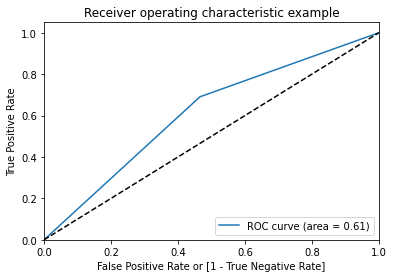

(array([0.        , 0.46561454, 1.        ]),
 array([0.        , 0.69055375, 1.        ]),
 array([2, 1, 0]))

In [275]:
# Drawing ROC curve.

draw_roc(y_pred_final["Performance Tag_y"], y_pred_final["predicted"])

<AxesSubplot:xlabel='prob'>

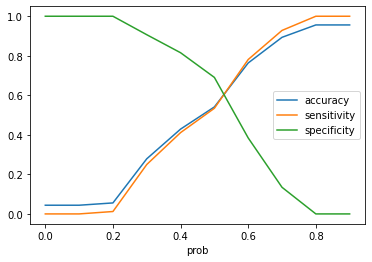

In [276]:
# Let's create columns with different probability cutoffs .

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_pred_final[i]= y_pred_final.Default_Prob.map(lambda x: 1 if x > i else 0)

# Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final["Performance Tag_y"], y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]

# Let's plot accuracy, sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x = 'prob', y = ['accuracy','sensitivity','specificity'])

# From the plot, optimal threshold = 0.56. 

In [277]:
# Using optimal threshold value to predict test data.

y_pred_final['final_predicted'] = y_pred_final.Default_Prob.map(lambda x: 1 if x > 0.56 else 0)

y_pred_final

,Performance Tag_y,Application ID,Default_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,46481,0.475632,0,1,1,1,1,1,0,0,0,0,0,0
1,0.0,36074,0.413407,0,1,1,1,1,1,0,0,0,0,0,0
2,0.0,35111,0.517416,1,1,1,1,1,1,1,0,0,0,0,0
3,0.0,44892,0.510440,1,1,1,1,1,1,1,0,0,0,0,0
4,0.0,15753,0.225930,0,1,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20939,0.0,357,0.225930,0,1,1,1,0,0,0,0,0,0,0,0
20940,0.0,11592,0.225930,0,1,1,1,0,0,0,0,0,0,0,0
20941,0.0,31658,0.517416,1,1,1,1,1,1,1,0,0,0,0,0
20942,0.0,51541,0.695452,1,1,1,1,1,1,1,1,0,0,0,1


In [278]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final["Performance Tag_y"], y_pred_final["final_predicted"])

0.6691653934300993

In [279]:
# Creating confusion matrix.

confusion = metrics.confusion_matrix(y_pred_final["Performance Tag_y"], y_pred_final["final_predicted"])

confusion

array([[13530,  6493],
       [  436,   485]])

In [280]:
# Calculating TP, TN, FP and FN.

TP = confusion[0,0] # true positive 

TN = confusion[1,1] # true negatives

FP = confusion[0,1] # false positives

FN = confusion[1,0] # false negatives

In [281]:
# Let's see the sensitivity of our logistic regression model.

TP / float(TP+FN)

0.968781326077617

In [282]:
# Let us calculate specificity.

TN / float(TN+FP)

0.06950415591860132

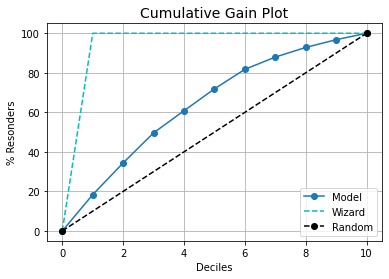

In [283]:
# Plotting Cumulative Gain Plot.

kds.metrics.plot_cumulative_gain(y_pred_final["Performance Tag_y"], y_pred_final["Default_Prob"])

# By the 5th decile, the model is able to identify 75% of defaulters.

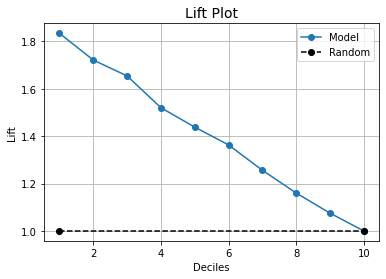

In [284]:
# Plotting Lift Plot.

kds.metrics.plot_lift(y_pred_final["Performance Tag_y"], y_pred_final["Default_Prob"])

# In the 5th decile, the lift is 1.42 which indicates that we have 1.42 times advantage over a random model.

### **Building Application Scorecard**

In [ ]:
# Credit scoring logic.

target_score = 400

target_odds = 10

pts_double_odds = 20

factor = pts_double_odds/np.log(2)

offset = target_score - factor * np.log(target_odds)

In [ ]:
# Score

y_pred_final["Score"] = offset + factor * y_pred_final["Default_Prob"]

y_pred_final

In [ ]:
# Check the distribution of scores.

sns.histplot(data = y_pred_final, x = "Score", hue = "Performance Tag_y")

# Defaults decrease above score of 348. Hence this can be considered as cut off score to issue credit cards.

### **Conclusions**

Model |Accuracy |Sensitivity |Specificity |%Gain |Lift
------|---------|------------|------------|------|----
Logistic Regression|66.91%|96.87%|6.95%|75|1.42
Decision Tree Classifier|56.05%|96.54%|5.56%|60|1.2
Random Forest Classifier|56.12%|96.54%|5.57%|60|1.2
Naive Bayes Classifier| 63.94%|97.39%|6.63%|70|1.42

Logistic regression model is giving best results in terms of %Gain. Hence this model was used for building application scorecard.

From the logistic regression model, following variables were identified as factors that affect default.

1. No of inquiries in last 12 months.
2. No of times 30DPD or worse in last 12 months.
3. No of trades opened in last 12 months.
4. No of times 90DPD or worse in last 6 months.
5. Avgas CC utilization in last 12 months.
6. Total No of Trades.

Hence to acquire right customers at acquisition stage,

1. Top 50% of the prospects (i.e. top 5 deciles) must be targeted.
2. By targeting top 5 deciles, 75% defaulters can be captured with a lift of 1.42.
3. Customers who have a credit score less than 348 should not be given credit cards as they are risky customers.